# Prevendo a cotação de fechamento da Dogecoin
Ciência dos Dados - Turma 2021-1/B - Profª Maria Kelly Venezuela
<br>Celso Henrique Alcalai Diniz e Victoria Leal Garcia de Souza

<img src="img/dogecoin.jpg" width="800" height="800">  

Esse é um projeto para fins acadêmicos, e os alunos não se responsabilizam pelo investimento caso alguém ache prudente investir na moeda. A natureza de investimentos em cryptomoedas é extremamente volátil, como demonstrado no projeto a seguir.

Em todos os momentos da predição, foi admitida uma taxa de erro significante por conta da imprevisibilidade do maior fator que afete a cotação desta moeda: a conta de Twitter do Elon Musk. Dogecoin foi sempre vista como uma cryptomoeda à parte desde sua criação em 2013, mas conforme ela vai sendo adotada cada vez mais pelo bilionário, ela tem sido popularizada e qualquer publicação vinda do Elon Musk exerce uma forte influência sobre a cotação da Dogecoin. No corpo do projeto, exemplificamos um pouco o tipo de postagem que Musk faz em sua conta e qual é o efeito deste mesmo tweet sobre a cotação divulgada pela TradingView, uma fonte reputável de informação sobre diversos ativos.

Neste projeto, foram usadas as técnicas de regressão linear, SVR e Random Forest para tentar prever a cotação de fechamento da Dogecoin por um período de tempo, considerando que não hajam tweets do Elon Musk que possam afetar a cotação drasticamente neste mesmo período.

# Elon Musk e Dogecoin
Como já mencionado, o bilionário e sua conta do Twitter são notórios por causar variações bruscas e repentinas na cotação da moeda simplesmente ao postar qualquer coisa, tendo ou não uma aparente relação à Dogecoin. Abaixo, foram inseridos alguns exemplos disto. Primeiro, um tweet do Elon Musk, e em seguida, dois tweets da TradingView que apontam o efeito que o tweet teve na cotação da moeda.

<img src="img/tweet_elon.png" width="400" height="400">  
Este tweet pode ser encontrado em <https://twitter.com/elonmusk/status/1390774840135766019>. Ao clicar no link, também é possível encontrar os dois tweets inseridos abaixo.

O tweeet acima contém uma foto do Elon Musk, acompanhado de duas celebridades sem associação à criptomoedas da data quando os três foram convidados a fazerem parte do programa de comédia Saturday Night Live (SNL), e foi inserido na imagem o cachorro do meme do Doge, que é o mascote e símbolo da criptomoeda Dogecoin. Como ele foi posto na imagem na metade de baixo, o sistema de preview de imagens do Twitter deixa o cachorro escondido até que o usuário clique na foto para vê-la inteira.

Abaixo, dois tweets em momentos diferentes pela conta oficial da TradingView, que sinalizam o horário que o tweet foi postado com uma flecha ("Your tweet.") para indicar que a subida do valor da moeda que veio em seguida é ao menos parcialmente influenciada pelo tweet. O primeiro tweet foi feito aproximadamente 15 minutos depois do tweet original do Elon Musk. O segundo, postado quase 3 horas e meia depois do tweet original, permite visualizar o tipo de efeito que a conta de Twitter de Musk tem sobre a cotação da moeda.

<img src="img/tweet_tv-curto.png" width="800" height="800">
<img src="img/tweet_tv-med.png" width="800" height="800"> 

É interessante notar que dia 3 de junho de 2021, Dogecoin foi listada pela corretora CoinBase - tida como a mais importante corretora de criptomoedas no mundo -, e não sofreu o chamado "Efeito CoinBase" (explicado melhor em <https://www.fxstreet.com/cryptocurrencies/news/here-is-how-the-so-called-coinbase-effect-will-pump-any-new-cryptocurrency-listed-202101290435>, o efeito é responsável por uma subida de em média 91% da cotação da moeda em até 5 dias de ser listada pela corretora) ao ser listada. 

<img src="img/tweet_coinbase.jpeg" width="500" height="500">
Este tweet pode ser encontrado em https://twitter.com/coinbase/status/1400532828127776771?s=20 , e foi usado como o anúncio da listagem da Dogecoin na corretora.

Curiosamente, o fenômeno do efeito não atingiu a Dogecoin, sugerindo outra vez que a maior e mais relevante influência na sua cotação vem diretamente e exclusivamente do Elon Musk.

# Importando bibliotecas relevantes

In [1]:
import os
import pandas_datareader as web
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

def clear():
    os.system('cls' if os.name == 'nt' else 'clear')

# Base de dados
A escolha por utilizar este tipo de base de dados - importada da internet, e não um .xlsx ou .csv baixado - é o fato de sempre pegar dados atualizados diariamente, o que permitiu incluir o mês de maio no projeto ao começar o mês de junho sem que fosse necessário fazer o download de outra base de dados.

Dogecoin nem sempre foi uma cryptomoeda tida como relevante, e por isso grande parte da sua vida como moeda desde 2013 tem sido com um preço estável, mas muito baixo - menos de milésimos de dólar americano. Nos últimos 6 meses, no entanto, desde que ela foi adotada pela Tesla como moeda oficial por conta da influência do Elon Musk, ela tem se valorizado de maneira extremamente volátil e às vezes imprevisível.

Usando o gráfico abaixo que contém, ao longo do último ano, o valor de fechamento da moeda é possível confirmar isto.

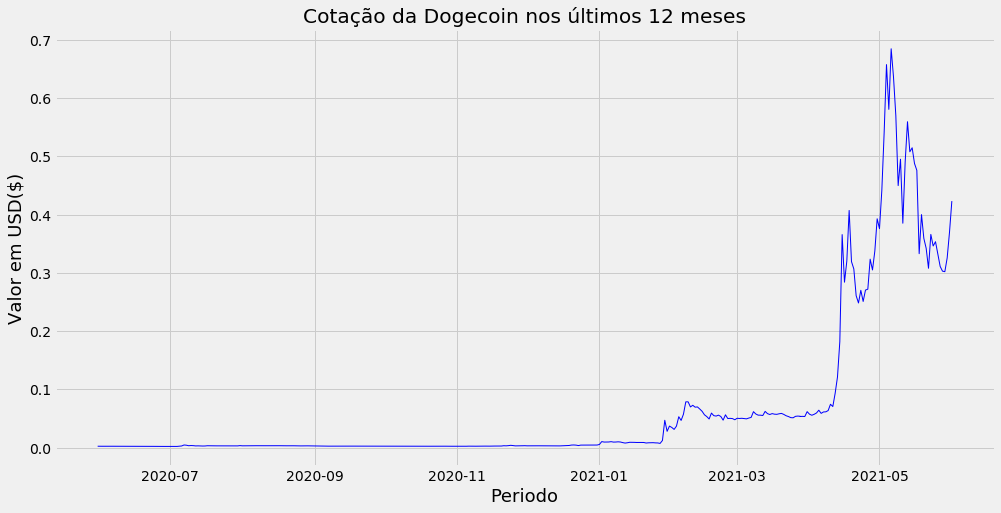

In [2]:
# importa a base de dados
df = web.DataReader('DOGE-USD', data_source='yahoo', start='2020-06-01', end='2021-06-01')

# plota o gráfico
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 7.5))
plt.title('Cotação da Dogecoin nos últimos 12 meses')
plt.plot(df['Close'], linewidth=1, color='b')
plt.xlabel('Periodo', fontsize=18)
plt.ylabel('Valor em USD($)', fontsize=18)
plt.show()

Como evidenciado no gráfico, não seria produtivo usar qualquer cotação antes do início de 2021, pois a mesma não é comparável com o que sucedeu nos meses seguintes. Por isso, o escopo da análise da cotação da moeda para fazer uma previsão foi definido como o período de 01/01/2021 até 07/06/2021.

# Regressão Linear
Usamos regressão linear pra tentar prever a cotação da DogeCoin para o próximo mês, pois a regressão linear é usada para tentar prever possíveis cotações de criptomoedas e assim, foi determinado como uma técnica apropriada para o projeto. 

Primeiro, foram importados os dados reais da cotação de janeiro, e a mesma foi plotada logo abaixo. Em seguida, foi feita a regressão linear usando este período de 31 dias para que fosse feita uma previsão tentativa do mês seguinte. Foi feita uma regressão linear usando a cotação de fechamento para todos os dias de janeiro de 2021 e em seguida, foi calculado o valor de $R^{2}$ e o termo independente da regressão, nesta mesma ordem. Finalmente, foi plotado um gráfico usando a predição do mês de fevereiro.

O mesmo processo foi repetido para os meses de fevereiro, março, abril e maio, de modo que fosse possível obter uma predição para o mês de junho por meio deste método.

Na célula abaixo está o método usado para determinar qual o valor qualitativo do coeficiente de correlação ($R^{2}$) das regressões lineares que serão usadas a seguir.

In [3]:
# testa o valor do coeficiente de correlação
def correlacao(coef):
    if (coef<0.35):
        return "muito fraca"
    elif (0.35<=coef<0.5):
        return "fraca"
    elif (0.5<=coef<0.6):
        return "mediana"
    elif (0.6<=coef<0.75):
        return "aceitável"
    else:
        return "forte"

## Janeiro

In [4]:
# importa a base de dados
df = web.DataReader('DOGE-USD', data_source='yahoo', start='2021-01-01', end='2021-01-31')

# limpa um pouco o dataframe
doge = df
doge = doge.reset_index(drop=False)
doge.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2021-01-01,0.005685,0.004615,0.004681,0.005685,228961515,0.005685
1,2021-01-02,0.013698,0.005584,0.005686,0.010615,3421562680,0.010615
2,2021-01-03,0.013867,0.009409,0.010602,0.009771,2707003608,0.009771
3,2021-01-04,0.011421,0.007878,0.009785,0.009767,1372398979,0.009767
4,2021-01-05,0.010219,0.008972,0.009767,0.009920,687256067,0.009920


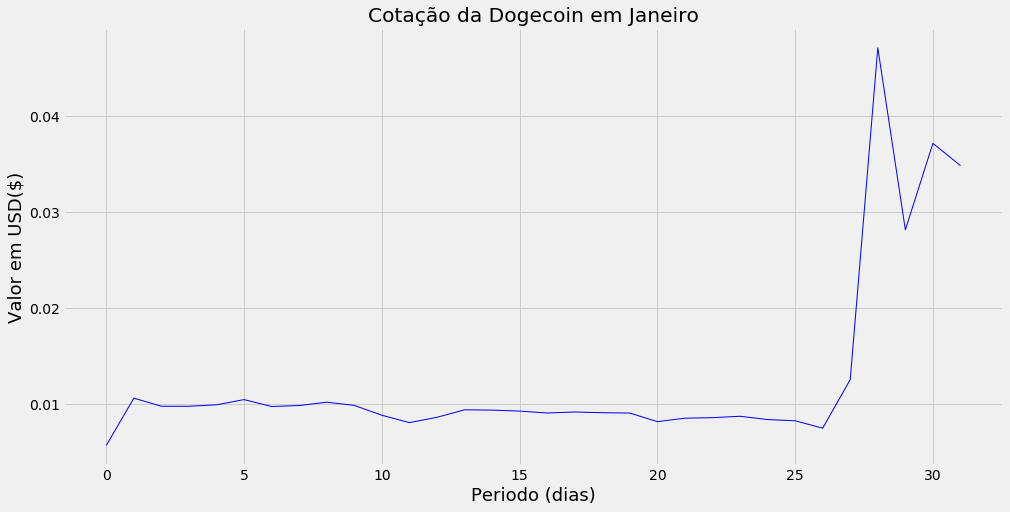

In [5]:
# array de número de dias no mês
tam = np.arange(0, 31)

# plota o gráfico da cotação real da moeda no mês
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 7.5))
plt.title('Cotação da Dogecoin em Janeiro')
plt.plot(doge['Close'], linewidth=1, color='b')
plt.xlabel('Periodo (dias)', fontsize=18)
plt.ylabel('Valor em USD($)', fontsize=18)
plt.show()

É possível ver no gráfico acima que o valor da moeda só tem uma subida significante na cotação durante a última semana de janeiro. Tendo isto em mente, é possível assumir que haverá um erro grande na predição para o mês de fevereiro, visto que já se sabe que a cotação durante fevereiro subirá muito além de $0.05USD, o que não é sugerido pelos dados do mês de janeiro.

### Regressão Linear

In [6]:
# faz a regressão linear
rang = np.arange(0,1,.03125)
reg = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None).fit(df,rang)

# imprime e avalia o coeficiente de correlação da regressão, imprime o termo independente
print("O coeficiente de correlação da regressão é:", reg.score(df, rang),
      ", o que sugere uma correlação", correlacao(reg.score(df, rang)),".\nO termo independente desta regressão é",
      reg.intercept_,".")

O coeficiente de correlação da regressão é: 0.374231095178013 , o que sugere uma correlação fraca .
O termo independente desta regressão é 0.1748579752818641 .


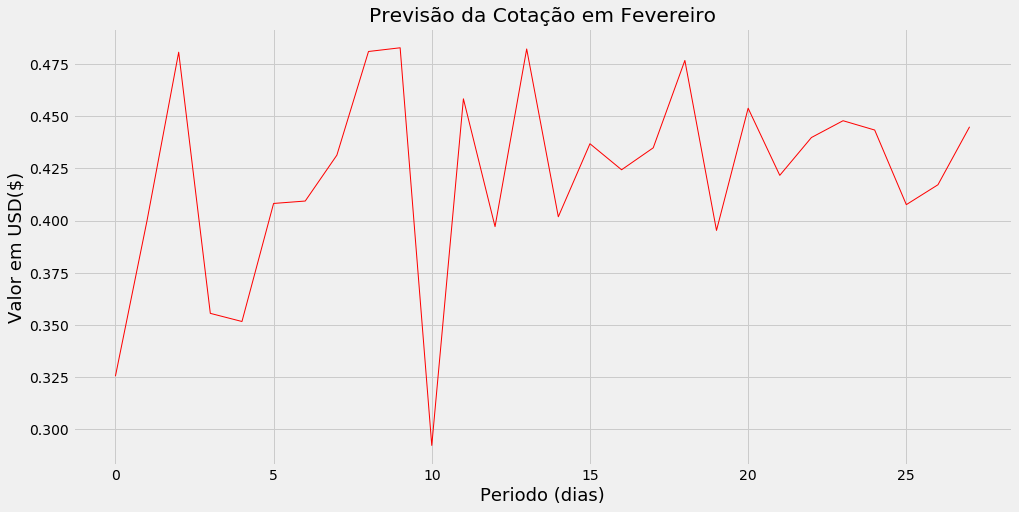

In [7]:
# faz a predição para fevereiro com base na regressão linear de janeiro
predicao = reg.predict(df)
pred = list(predicao)

# este laço remove os 3 dias adicionais da predição, pois foi feita com um período de 31 dias e fev/2021 tem 28 dias
while (len(pred) != 28):
    del(pred[-1])

# número de dias no mês
tam = np.arange(0, len(pred))

# plota o gráfico da predição
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 7.5))
plt.title('Previsão da Cotação em Fevereiro')
plt.plot(tam, pred, linewidth=1, color='r')
plt.xlabel('Periodo (dias)', fontsize=18)
plt.ylabel('Valor em USD($)', fontsize=18)
plt.show()

## Fevereiro

In [8]:
# importa a base de dados
# é importante notar que, para que o mês de março receba uma predição de 31 dias, é importante que seja considerado um mês
# fictício de fevereiro com 31 dias. no entanto, a predição de fevereiro foi feita com 28 dias.
df = web.DataReader('DOGE-USD', data_source='yahoo', start='2021-02-01', end='2021-03-03')

# limpa um pouco o dataframe
doge = df
doge = doge.reset_index(drop=False)
doge.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2021-02-01,0.043250,0.033367,0.037054,0.034875,6319224026,0.034875
1,2021-02-02,0.034926,0.029195,0.034910,0.031520,3090896595,0.031520
2,2021-02-03,0.039105,0.031146,0.031493,0.037120,3146856788,0.037120
3,2021-02-04,0.057869,0.035945,0.037226,0.053289,13040837601,0.053289
4,2021-02-05,0.053740,0.043540,0.053043,0.046935,6136160058,0.046935


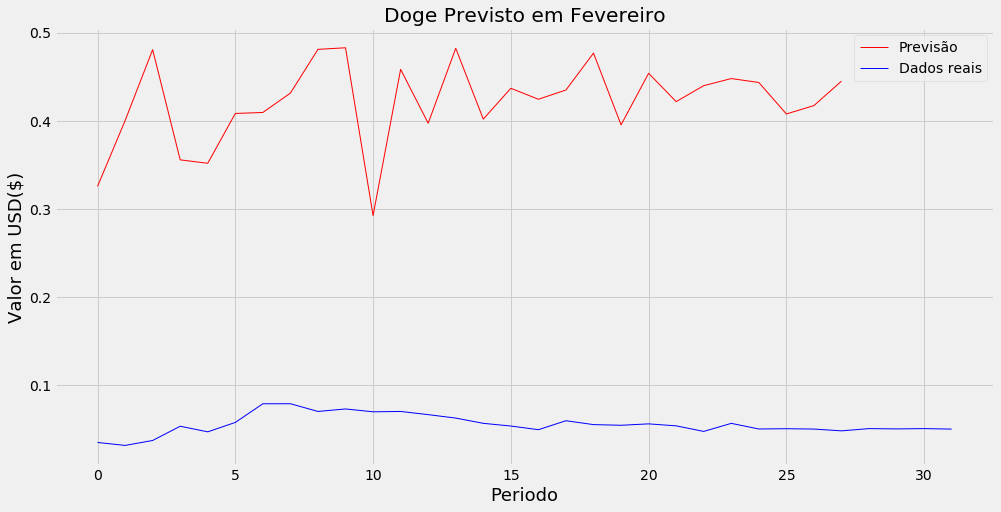

In [9]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 7.5))

plt.title('Doge Previsto em Fevereiro')
plt.plot(tam, pred, label='Previsão', linewidth=1, color='r')
plt.plot(doge['Close'], label='Dados reais', linewidth=1, color='b')
plt.legend(loc="best")
plt.xlabel('Periodo', fontsize=18)
plt.ylabel('Valor em USD($)', fontsize=18)

plt.show()

### Reajuste do erro
Para tentar corrigir a predição, foi calculado o erro médio da predição, que será subtraído de cada dia do período. Será subtraída a taxa média de erro de acordo com o erro médio, como forma de tentar ajustar a predição.

0.3789105665940522
A porcentagem média de erro é de 7.080909472287544 % por dia.


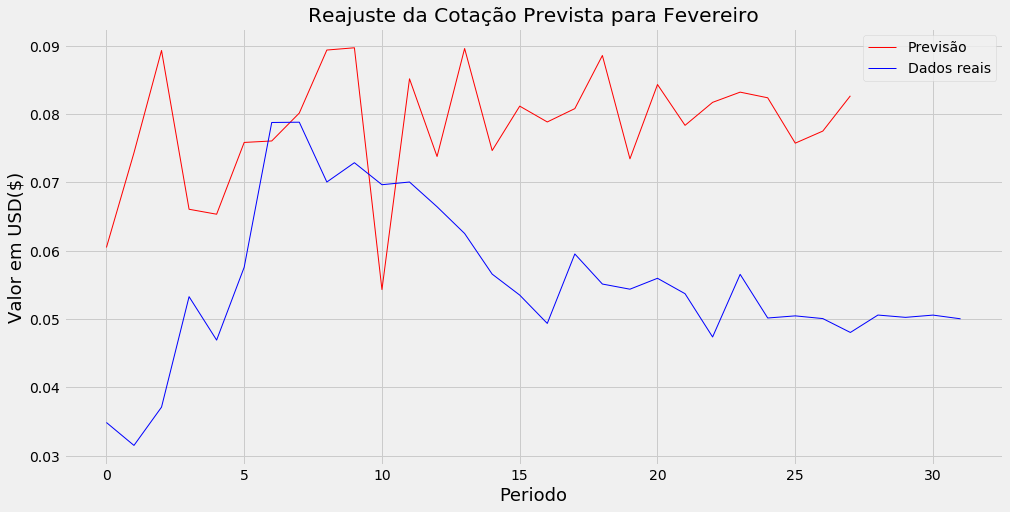

In [10]:
real = df.Close.tolist()
erro = 0.0
epercent = 1.0

# calcula o erro médio e a porcentagem de erro médio da predição
for i in range(0, len(pred)):
    erro = erro + (pred[i]-real[i])
    epercent = epercent*((pred[i]-real[i])/real[i])

erro = erro/i
epercent = (epercent**(1/i))
print(erro)
print("A porcentagem média de erro é de", epercent, "% por dia.")

# reajusta 
for i in range(0, len(pred)):
    pred[i] = (pred[i]*((100-epercent)/100))/5
    
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 7.5))

plt.title('Reajuste da Cotação Prevista para Fevereiro')
plt.plot(tam, pred, label='Previsão', linewidth=1, color='r')
plt.plot(doge['Close'], label='Dados reais', linewidth=1, color='b')
plt.legend(loc="best")
plt.xlabel('Periodo', fontsize=18)
plt.ylabel('Valor em USD($)', fontsize=18)

plt.show()

### Regressão Linear

In [11]:
rang = np.arange(0,1,.03125)
reg = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None).fit(df,rang)
print("O coeficiente de correlação da regressão é:", reg.score(df, rang),
      ", o que sugere uma correlação", correlacao(reg.score(df, rang)),".\nO termo independente desta regressão é",
      reg.intercept_,".")

O coeficiente de correlação da regressão é: 0.5522037246777375 , o que sugere uma correlação mediana .
O termo independente desta regressão é 0.39847056381667617 .


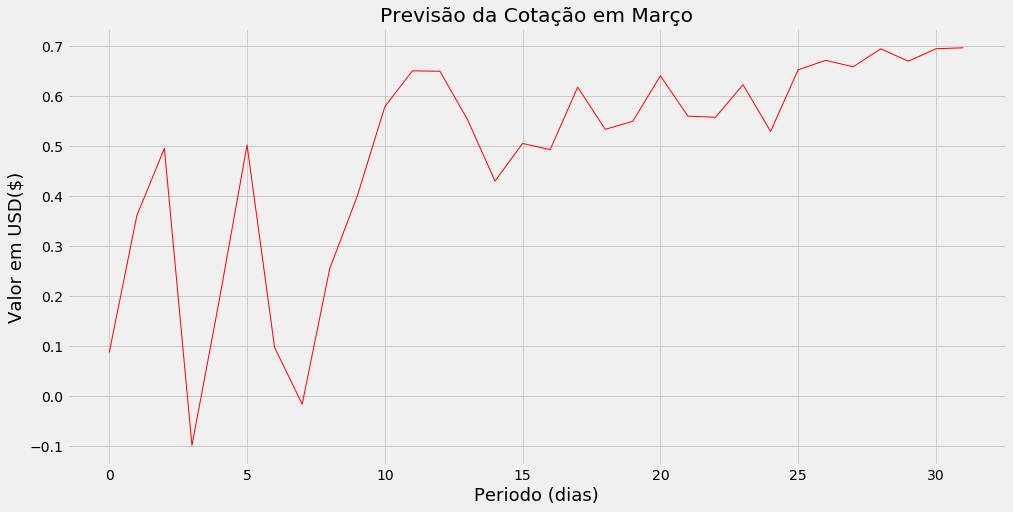

In [12]:
predicao = reg.predict(df)

pred = list(predicao)

tam = np.arange(0, len(pred))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 7.5))
plt.title('Previsão da Cotação em Março')
plt.plot(tam, pred, linewidth=1, color='r')
plt.xlabel('Periodo (dias)', fontsize=18)
plt.ylabel('Valor em USD($)', fontsize=18)
plt.show()

## Março

In [13]:
df = web.DataReader('DOGE-USD', data_source='yahoo', start='2021-03-01', end='2021-03-31')
doge = df
doge = doge.reset_index(drop=False)
doge.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2021-03-01,0.051479,0.048029,0.048070,0.050599,1494427207,0.050599
1,2021-03-02,0.052382,0.049299,0.050596,0.050262,1346282318,0.050262
2,2021-03-03,0.052126,0.050078,0.050278,0.050592,1093877445,0.050592
3,2021-03-04,0.051087,0.047879,0.050587,0.050048,1170617084,0.050048
4,2021-03-05,0.050854,0.048147,0.050028,0.049609,1173113591,0.049609


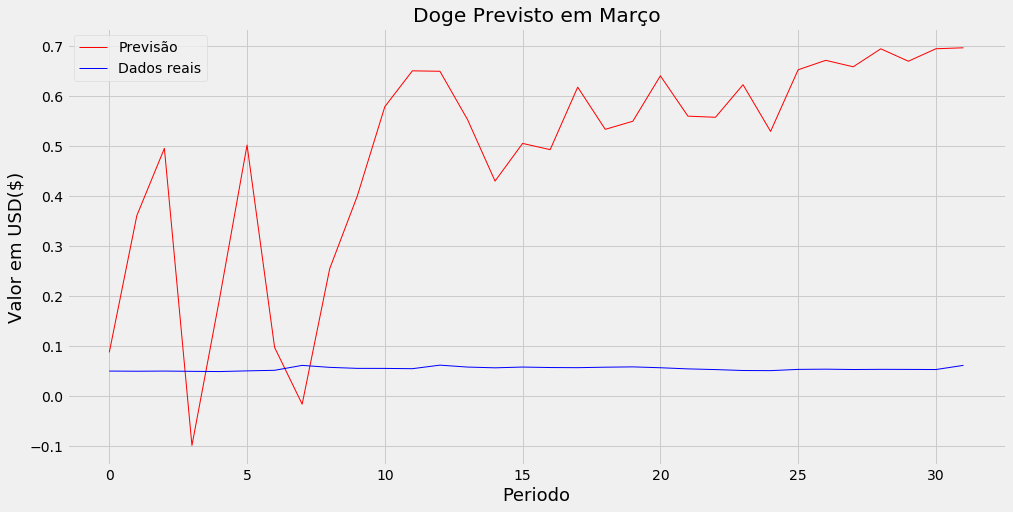

In [14]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 7.5))

plt.title('Doge Previsto em Março')
plt.plot(tam, pred, label='Previsão', linewidth=1, color='r')
plt.plot(doge['Close'], label='Dados reais', linewidth=1, color='b')
plt.legend(loc="best")
plt.xlabel('Periodo', fontsize=18)
plt.ylabel('Valor em USD($)', fontsize=18)

plt.show()

### Reajuste do erro
Para tentar corrigir a predição, foi calculado o erro médio da predição, que será subtraído de cada dia do período. Será subtraída a taxa média de erro de acordo com o erro médio, como forma de tentar ajustar a predição.

0.4430644515781634
A porcentagem média de erro é de 7.149056806425761 % por dia.


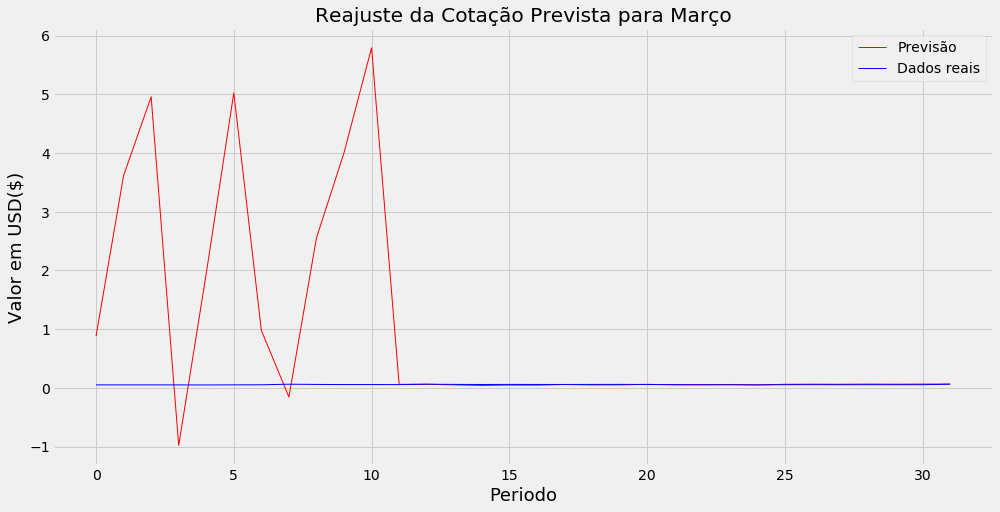

In [15]:
real = df.Close.tolist()
erro = 0.0
epercent = 1.0

# calcula o erro médio e a porcentagem de erro médio da predição
for i in range(0, len(pred)):
    erro = erro + (pred[i]-real[i])
    epercent = epercent*((pred[i]-real[i])/real[i])

erro = erro/i
epercent = (epercent**(1/i))
print(erro)
print("A porcentagem média de erro é de", epercent, "% por dia.")

# reajusta 
for i in range(0, len(pred)):
    if (i<=10):
        pred[i] = pred[i]*10
    else:
        pred[i] = (pred[i]*((100-epercent)/100))/10
    
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 7.5))

plt.title('Reajuste da Cotação Prevista para Março')
plt.plot(tam, pred, label='Previsão', linewidth=1, color='r')
plt.plot(doge['Close'], label='Dados reais', linewidth=1, color='b')
plt.legend(loc="best")
plt.xlabel('Periodo', fontsize=18)
plt.ylabel('Valor em USD($)', fontsize=18)

plt.show()

### Regressão Linear

In [16]:
rang = np.arange(0,1,.03125)
reg = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None).fit(df,rang)
print("O coeficiente de correlação da regressão é:", reg.score(df, rang),
      ", o que sugere uma correlação", correlacao(reg.score(df, rang)),".\nO termo independente desta regressão é",
      reg.intercept_,".")

O coeficiente de correlação da regressão é: 0.44626564993443457 , o que sugere uma correlação fraca .
O termo independente desta regressão é -1.5134629947994092 .


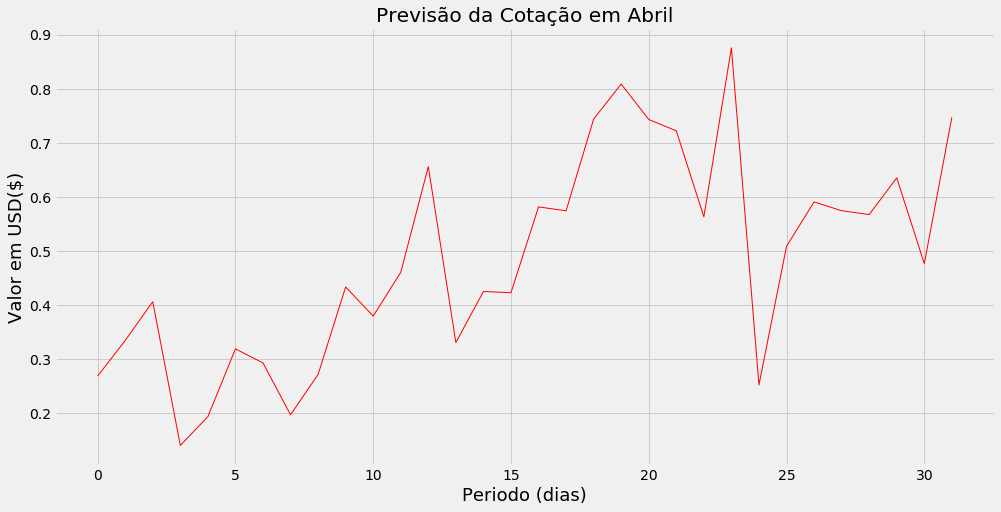

In [17]:
predicao = reg.predict(df)

pred = list(predicao)

tam = np.arange(0, len(pred))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 7.5))
plt.title('Previsão da Cotação em Abril')
plt.plot(tam, pred, linewidth=1, color='r')
plt.xlabel('Periodo (dias)', fontsize=18)
plt.ylabel('Valor em USD($)', fontsize=18)
plt.show()

## Abril

In [18]:
df = web.DataReader('DOGE-USD', data_source='yahoo', start='2021-04-01', end='2021-05-01')
doge = df
doge = doge.reset_index(drop=False)
doge.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2021-03-31,0.070111,0.053644,0.053655,0.061986,5816046822,0.061986
1,2021-04-01,0.062249,0.057333,0.061968,0.057664,2166925111,0.057664
2,2021-04-02,0.059484,0.055804,0.057658,0.055804,1136931403,0.055804
3,2021-04-03,0.058107,0.055295,0.055776,0.057404,938035097,0.057404
4,2021-04-04,0.060153,0.056435,0.057411,0.059696,1513832721,0.059696


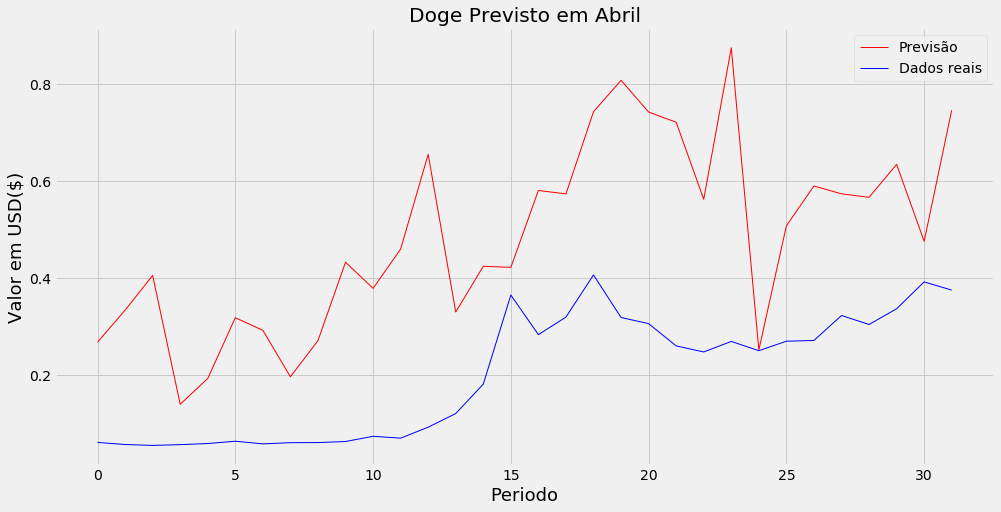

In [19]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 7.5))

plt.title('Doge Previsto em Abril')
plt.plot(tam, pred, label='Previsão', linewidth=1, color='r')
plt.plot(doge['Close'], label='Dados reais', linewidth=1, color='b')
plt.legend(loc="best")
plt.xlabel('Periodo', fontsize=18)
plt.ylabel('Valor em USD($)', fontsize=18)

plt.show()

### Reajuste do erro
Para tentar corrigir a predição, foi calculado o erro médio da predição, que será subtraído de cada dia do período. Será subtraída a taxa média de erro de acordo com o erro médio, como forma de tentar ajustar a predição.

0.29164564417254535
A porcentagem média de erro é de 1.4277523872542952 % por dia.


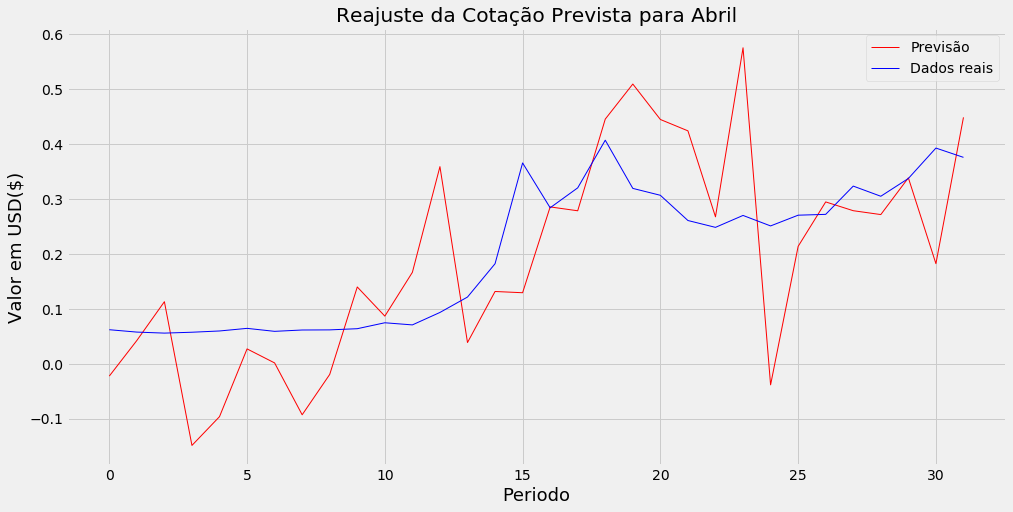

In [20]:
real = df.Close.tolist()
erro = 0.0
epercent = 1.0

# calcula o erro médio e a porcentagem de erro médio da predição
for i in range(0, len(pred)):
    erro = erro + (pred[i]-real[i])
    epercent = epercent*((pred[i]-real[i])/real[i])

erro = erro/i
epercent = (epercent**(1/i))
print(erro)
print("A porcentagem média de erro é de", epercent, "% por dia.")

# reajusta 
for i in range(0, len(pred)):
    pred[i] = (pred[i]-erro)*(1-(epercent/100))
    
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 7.5))

plt.title('Reajuste da Cotação Prevista para Abril')
plt.plot(tam, pred, label='Previsão', linewidth=1, color='r')
plt.plot(doge['Close'], label='Dados reais', linewidth=1, color='b')
plt.legend(loc="best")
plt.xlabel('Periodo', fontsize=18)
plt.ylabel('Valor em USD($)', fontsize=18)

plt.show()

### Regressão Linear

In [21]:
rang = np.arange(0,1,.03125)
reg = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None).fit(df,rang)
print("O coeficiente de correlação da regressão é:", reg.score(df, rang),
      ", o que sugere uma correlação", correlacao(reg.score(df, rang)),".\nO termo independente desta regressão é",
      reg.intercept_,".")

O coeficiente de correlação da regressão é: 0.8618436741564689 , o que sugere uma correlação forte .
O termo independente desta regressão é 0.07383846558505136 .


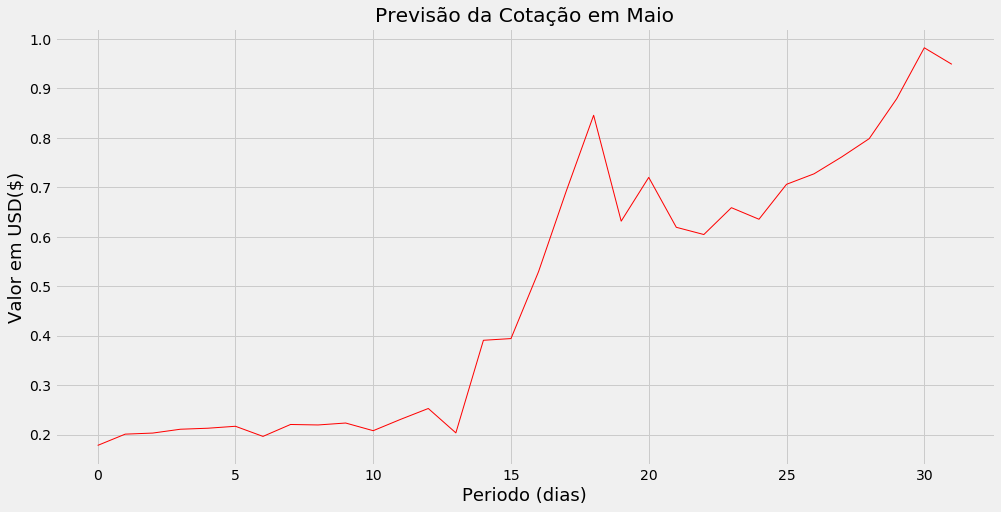

In [22]:
predicao = reg.predict(df)

pred = list(predicao)

tam = np.arange(0, len(pred))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 7.5))
plt.title('Previsão da Cotação em Maio')
plt.plot(tam, pred, linewidth=1, color='r')
plt.xlabel('Periodo (dias)', fontsize=18)
plt.ylabel('Valor em USD($)', fontsize=18)
plt.show()

## Maio

In [23]:
df = web.DataReader('DOGE-USD', data_source='yahoo', start='2021-05-01', end='2021-05-31')
doge = df
doge = doge.reset_index(drop=False)
doge.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2021-04-30,0.397135,0.328290,0.337559,0.392987,10123343703,0.392987
1,2021-05-01,0.400029,0.364874,0.391087,0.376046,8040406918,0.376046
2,2021-05-02,0.445567,0.373631,0.373631,0.441707,10526649978,0.441707
3,2021-05-03,0.605998,0.400800,0.440274,0.541334,38238126181,0.541334
4,2021-05-04,0.695262,0.523822,0.537355,0.657633,42525098292,0.657633


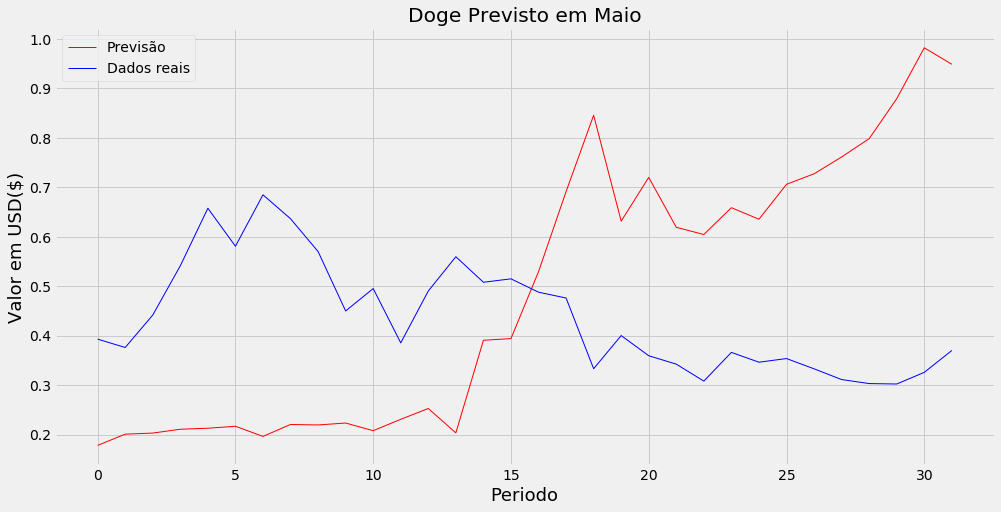

In [24]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 7.5))

plt.title('Doge Previsto em Maio')
plt.plot(tam, pred, label='Previsão',linewidth=1, color='r')
plt.plot(doge['Close'], label='Dados reais', linewidth=1, color='b')
plt.legend(loc="best")
plt.xlabel('Periodo', fontsize=18)
plt.ylabel('Valor em USD($)', fontsize=18)

plt.show()

### Reajuste do erro
Para tentar corrigir a predição, foi calculado o erro médio da predição, que será subtraído de cada dia do período. Será subtraída a taxa média de erro de acordo com o erro médio, como forma de tentar ajustar a predição.

0.048261644378785204
A porcentagem média de erro é de 0.6784093506999866 % por dia.


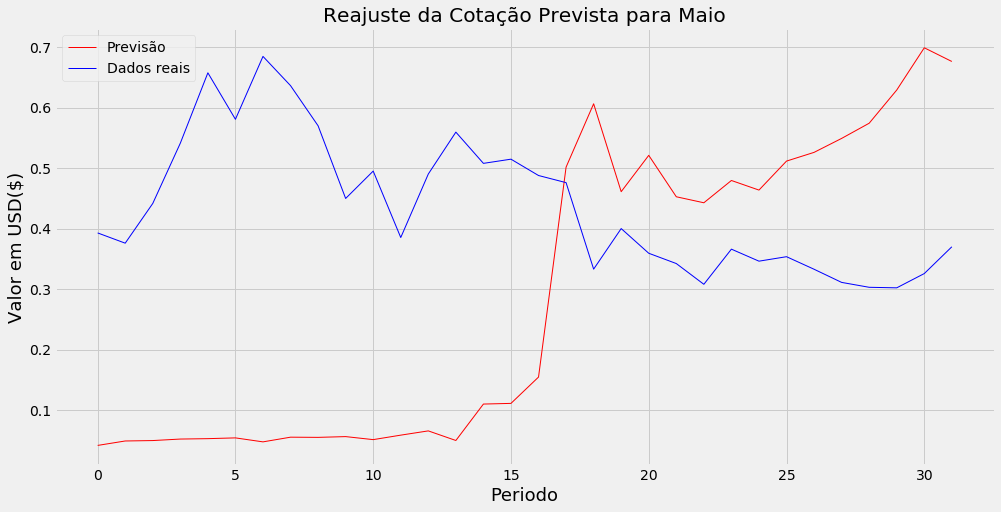

In [25]:
real = df.Close.tolist()
erro = 0.0
epercent = 1.0

# calcula o erro médio e a porcentagem de erro médio da predição
for i in range(0, len(pred)):
    erro = erro + (pred[i]-real[i])
    epercent = epercent*((pred[i]-real[i])/real[i])

erro = erro/i
epercent = (epercent**(1/i))
print(erro)
print("A porcentagem média de erro é de", epercent, "% por dia.")

# reajusta 
for i in range(0, len(pred)):
    if (i <= (len(pred)/2)):
        pred[i] = (pred[i]-erro)*(1-epercent)
    else:
        pred[i] = (pred[i]+erro)*epercent
    
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 7.5))

plt.title('Reajuste da Cotação Prevista para Maio')
plt.plot(tam, pred, label='Previsão', linewidth=1, color='r')
plt.plot(doge['Close'], label='Dados reais', linewidth=1, color='b')
plt.legend(loc="best")
plt.xlabel('Periodo', fontsize=18)
plt.ylabel('Valor em USD($)', fontsize=18)

plt.show()

### Regressão Linear

In [26]:
rang = np.arange(0,1,.03125)
reg = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None).fit(df,rang)
print("O coeficiente de correlação da regressão é:", reg.score(df, rang),
      ", o que sugere uma correlação", correlacao(reg.score(df, rang)),".\nO termo independente desta regressão é",
      reg.intercept_,".")

O coeficiente de correlação da regressão é: 0.52146593978316 , o que sugere uma correlação mediana .
O termo independente desta regressão é 1.0890053636230008 .


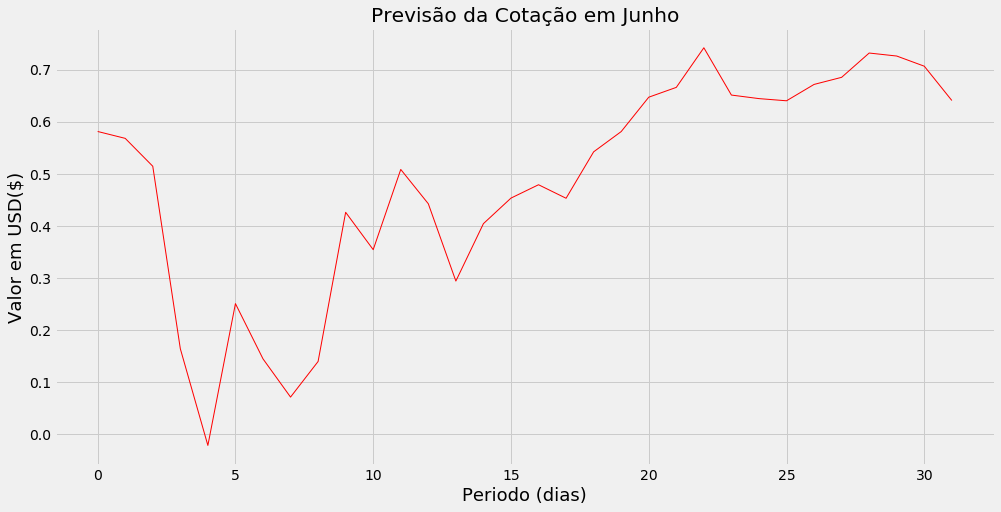

In [27]:
predicao = reg.predict(df)

pred = list(predicao)

tam = np.arange(0, len(pred))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 7.5))
plt.title('Previsão da Cotação em Junho')
plt.plot(tam, pred, linewidth=1, color='r')
plt.xlabel('Periodo (dias)', fontsize=18)
plt.ylabel('Valor em USD($)', fontsize=18)
plt.show()

# SVR
Ao não obter muita precisão em uma predição usando regressão linear, foi experimentada a implementação de um modelo de SVR.

In [28]:
#Selecionando um intervalo relevante de 6 meses
df = web.DataReader('DOGE-USD', data_source='yahoo', start='2020-12-01', end='2021-06-06')
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-01,0.003572,0.003269,0.003551,0.003335,80163603,0.003335
2020-12-02,0.003436,0.003293,0.003335,0.003374,58705661,0.003374
2020-12-03,0.003500,0.003352,0.003375,0.003428,47907032,0.003428
2020-12-04,0.003447,0.003285,0.003429,0.003298,45062222,0.003298
2020-12-05,0.003414,0.003268,0.003297,0.003397,43386583,0.003397


Text(0, 0.5, 'Preco em $ USD')

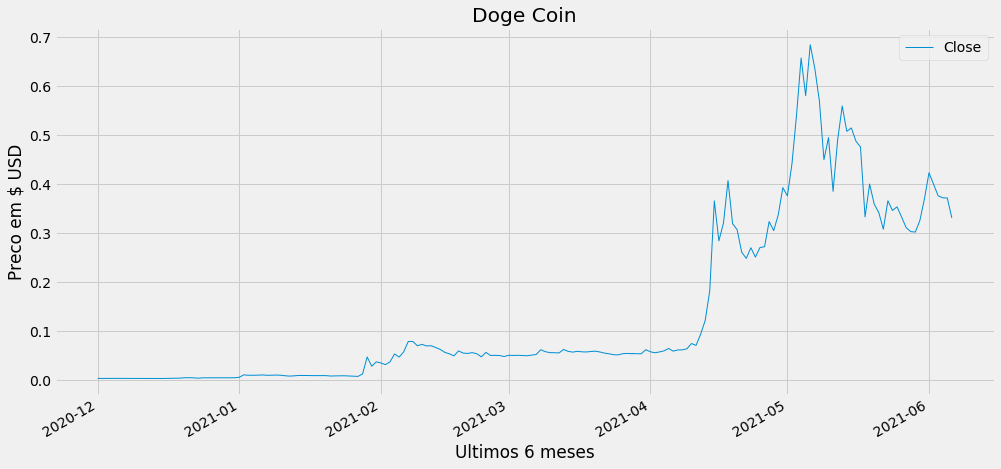

In [29]:
doge = df
#pega somente os valores de fechamento
doge = doge.loc[: ,["Close"]] 
plt.style.use('fivethirtyeight')
# plot dos valores de fechamento dos ultimos 6 meses
doge.plot(figsize=(15,7.5),linewidth=1); 
plt.title("Doge Coin")
plt.xlabel("Ultimos 6 meses")
plt.ylabel("Preco em $ USD")

In [30]:
# Prever n dias no futuro
#Selecionamos 30 dias dentro do periodo pois a moeda é muito valotil
#e nesse periodo sofreu muita manipulacao de preco
predic_day = 30 

# Cria uma coluna Predction com valores 7 dias adiantado
doge["Prediction"] = doge[["Close"]].shift(-predic_day)

In [31]:
doge.head()

,Close,Prediction
Date,,
2020-12-01,0.003335,0.004682
2020-12-02,0.003374,0.005685
2020-12-03,0.003428,0.010615
2020-12-04,0.003298,0.009771
2020-12-05,0.003397,0.009767


In [32]:
#Como a coluna Prediction esta adiantada em 30 dias, as ultimas 7 linhas estao vazias, reservadas para a predicao
doge.tail()

,Close,Prediction
Date,,
2021-06-02,0.399963,NaN
2021-06-03,0.376323,NaN
2021-06-04,0.372177,NaN
2021-06-05,0.371807,NaN
2021-06-06,0.331050,NaN


In [33]:
# data Set independente
#remove os valores da coluna, qual ira conter os dados que estamos procurando
X = np.array(doge.drop(["Prediction"], 1)) 
# remove a ultima linha da previsao, pois esta deve estar vazia, por nao conter mais dados a ser previstos
X = X[:len(doge)-predic_day]
print(X)

# pega os dados da coluna Prediction
y = np.array(doge["Prediction"]) 
# pegar todos os daos menos o n+1 (N é o numero de dias)
y = y[:-predic_day] 
print(y)

[[0.003335  ]
 [0.003374  ]
 [0.003428  ]
 [0.003298  ]
 [0.003397  ]
 [0.003388  ]
 [0.003342  ]
 [0.003179  ]
 [0.003158  ]
 [0.003105  ]
 [0.003079  ]
 [0.003163  ]
 [0.003256  ]
 [0.003231  ]
 [0.003206  ]
 [0.003416  ]
 [0.00373   ]
 [0.003858  ]
 [0.003927  ]
 [0.004625  ]
 [0.004787  ]
 [0.004508  ]
 [0.003768  ]
 [0.00457   ]
 [0.004582  ]
 [0.004494  ]
 [0.004548  ]
 [0.004592  ]
 [0.004486  ]
 [0.004636  ]
 [0.004682  ]
 [0.005685  ]
 [0.010615  ]
 [0.009771  ]
 [0.009767  ]
 [0.00992   ]
 [0.010465  ]
 [0.009742  ]
 [0.009846  ]
 [0.010194  ]
 [0.00986   ]
 [0.008835  ]
 [0.008063  ]
 [0.008616  ]
 [0.009397  ]
 [0.009369  ]
 [0.009265  ]
 [0.009067  ]
 [0.009171  ]
 [0.009098  ]
 [0.00906   ]
 [0.008166  ]
 [0.008524  ]
 [0.008579  ]
 [0.008727  ]
 [0.008383  ]
 [0.008255  ]
 [0.007482  ]
 [0.012555  ]
 [0.047162  ]
 [0.028176  ]
 [0.037196  ]
 [0.034875  ]
 [0.03152   ]
 [0.03712   ]
 [0.053289  ]
 [0.046935  ]
 [0.057595  ]
 [0.078782  ]
 [0.078825  ]
 [0.07007   ]
 [0.07

In [34]:
# separa os dados de trainamento(80%) e dados de teste (20%).

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

# lista de predicao para previsao, contendo os precos dos ultimos 7 dias do data set original
# remove a coluna predicao para usar somente A coluna Close
prediction_days_array = np.array(doge.drop(["Prediction"], 1))[-predic_day:] 
prediction_days_array

array([[0.57007003],
       [0.44996399],
       [0.495231  ],
       [0.38537601],
       [0.490374  ],
       [0.55960399],
       [0.507972  ],
       [0.51489502],
       [0.487892  ],
       [0.47611499],
       [0.333123  ],
       [0.40019399],
       [0.359382  ],
       [0.34237099],
       [0.30807099],
       [0.366162  ],
       [0.346302  ],
       [0.35369301],
       [0.33294499],
       [0.311205  ],
       [0.30311   ],
       [0.30222401],
       [0.32580999],
       [0.37007701],
       [0.423374  ],
       [0.39996299],
       [0.37632301],
       [0.372177  ],
       [0.37180701],
       [0.33105001]])

In [35]:
# Cria e treina a ferramenta de regressao
svr_rbf = SVR(kernel="rbf", C=1e3, gamma="auto")
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [36]:
# pontuacao de confianca do modelo
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
svr_rbf_confidence

0.5369115622460118

In [37]:
# exibir os dados que foram preditos no teste
svm_predction = svr_rbf.predict(x_test)

print("valores previstos no teste:")
print(svm_predction) # printa os valores previstos

print()

print("Valores reais/atuais:")
print(y_test) # printa os valores atuais

valores previstos no teste:
[0.02210769 0.02228487 0.02600536 0.01744936 0.18498132 0.03695765
 0.38966307 0.2251214  0.41623489 0.17121767 0.41676802 0.04191366
 0.15647464 0.28676816 0.41883097 0.28136978 0.30631821 0.17725322
 0.37259916 0.01829436 0.03550701 0.41572474 0.0179512  0.17291158
 0.01831745 0.22521576 0.41608094 0.17093008 0.03586432 0.18025926
 0.38112235 0.21195783]

Valores reais/atuais:
[0.008383   0.008255   0.037196   0.00986    0.63643903 0.05352
 0.37007701 0.057998   0.30807099 0.063845   0.346302   0.034875
 0.054377   0.372177   0.487892   0.33105001 0.55960399 0.32047501
 0.333123   0.004682   0.070069   0.359382   0.008616   0.057653
 0.010465   0.056004   0.30311    0.44170699 0.047392   0.058961
 0.507972   0.055349  ]


In [38]:
#Previsao para os proximos 7 dias 
svm_predction = svr_rbf.predict(prediction_days_array) #last 7 days

print("Valores preditos com dados ainda nao vistos pelo modelo:")
print(svm_predction) #predito

print()

print("Valores reais")
print(doge.tail(predic_day)) #preco atual


Valores preditos com dados ainda nao vistos pelo modelo:
[0.28958833 0.34738747 0.32147738 0.38479458 0.3241088  0.29282812
 0.31482375 0.31137897 0.32547157 0.33208503 0.40837019 0.37665455
 0.39773213 0.40495398 0.41548238 0.39455575 0.4033879  0.40027245
 0.40843208 0.41478026 0.41647491 0.41663648 0.41078617 0.39265307
 0.36322461 0.37678468 0.38952183 0.39161304 0.39179724 0.40908158]

Valores reais
               Close  Prediction
Date                            
2021-05-08  0.570070         NaN
2021-05-09  0.449964         NaN
2021-05-10  0.495231         NaN
2021-05-11  0.385376         NaN
2021-05-12  0.490374         NaN
2021-05-13  0.559604         NaN
2021-05-14  0.507972         NaN
2021-05-15  0.514895         NaN
2021-05-16  0.487892         NaN
2021-05-17  0.476115         NaN
2021-05-18  0.333123         NaN
2021-05-19  0.400194         NaN
2021-05-20  0.359382         NaN
2021-05-21  0.342371         NaN
2021-05-22  0.308071         NaN
2021-05-23  0.366162         Na

In [39]:
data = doge.tail(predic_day)
data = data.reset_index(drop=False)
data = data.loc[:, ["Date", "Close"]]

In [40]:
#Selecionando um intervalo relevante de 6 meses
df = web.DataReader('DOGE-USD', data_source='yahoo', start='2021-05-8', end='2021-06-06') 

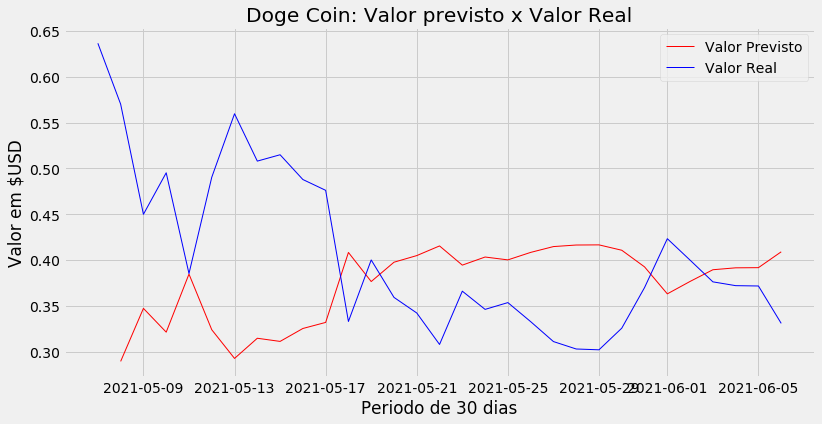

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(data.Date, svm_predction, label="Valor Previsto", linewidth=1, color='r')
plt.plot(df.Close, label="Valor Real", linewidth=1, color='b')
plt.xlabel("Periodo de 30 dias")
plt.ylabel("Valor em $USD")
plt.title("Doge Coin: Valor previsto x Valor Real")
plt.legend()
plt.show();

# Random Forest Regression

In [42]:
# Previsao com base nos dados de quando o valor do doge passou a ser relevante, entre Dez/20 inicio de Jan/21
df = web.DataReader('DOGE-USD', data_source='yahoo', start='2020-12-01', end='2021-01-31') 
#df.head()

Text(0, 0.5, 'Preco em $ USD')

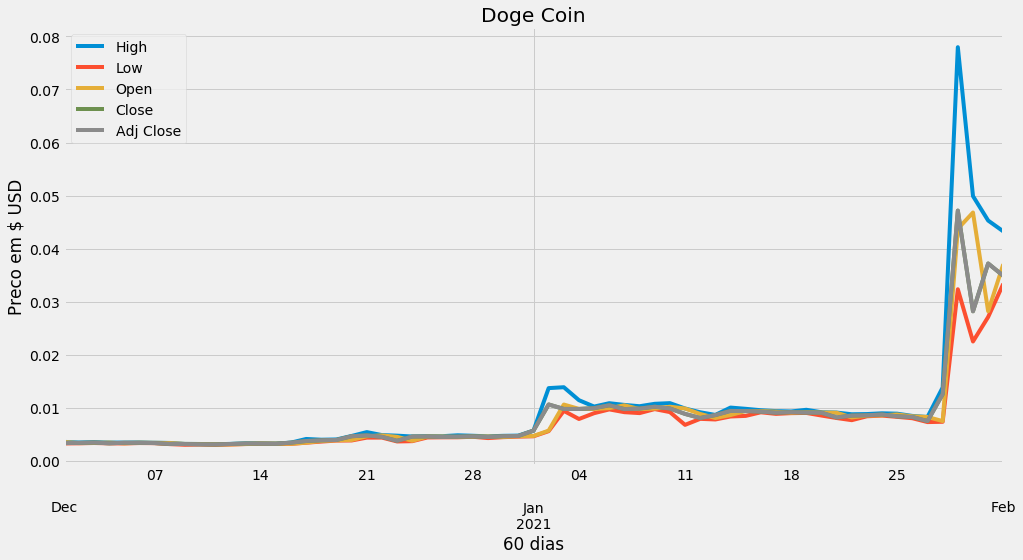

In [43]:
dec = df
dec = dec.drop(["Volume"], axis=1) #Remover a coluna Volume para nao distorcer o grafico.
plt.style.use('fivethirtyeight')
dec.plot(figsize=(15,7.5)) # plota o grafico com valores da dogecoin nos ultimos 6 meses
plt.title("Doge Coin")
plt.xlabel("60 dias")
plt.ylabel("Preco em $ USD")

In [44]:
doge = df
doge = doge.loc[: ,["Close"]] # Utilizamos o preco de fechamento do dia anterior como refencia
doge.head()

,Close
Date,
2020-12-01,0.003335
2020-12-02,0.003374
2020-12-03,0.003428
2020-12-04,0.003298
2020-12-05,0.003397


In [45]:
# Prever n dias no futuro
predic_day = 30 #7 dias

# cria uma coluna previsao com dados dos proximos 30. A coluna vai servir para ser utilizada na previsao apos a separacao das bases de teste e treinamento
# os dados contidos na coluna Prediction estao 30 dias a frente da doluna Close.
doge["Prediction"] = doge[["Close"]].shift(-predic_day)

In [46]:
# Data set independente
X = np.array(doge.drop(["Prediction"], 1)) #remove os valores da coluna, qual ira conter os dados que estamos procurando
X = X[:len(doge)-predic_day -1] # remove a ultima linha da previsao, pois esta deve estar vazia, por nao conter mais dados a ser previstos
X

array([[0.003335],
       [0.003374],
       [0.003428],
       [0.003298],
       [0.003397],
       [0.003388],
       [0.003342],
       [0.003179],
       [0.003158],
       [0.003105],
       [0.003079],
       [0.003163],
       [0.003256],
       [0.003231],
       [0.003206],
       [0.003416],
       [0.00373 ],
       [0.003858],
       [0.003927],
       [0.004625],
       [0.004787],
       [0.004508],
       [0.003768],
       [0.00457 ],
       [0.004582],
       [0.004494],
       [0.004548],
       [0.004592],
       [0.004486],
       [0.004636],
       [0.004682],
       [0.005685]])

In [47]:
#Data set dependende
y = np.array(doge["Prediction"]) # pega os dados da coluna Prediction
y = y[:-predic_day -1] # pegar todos os daos menos o n+1 (N é o numero de dias)
y

array([0.004682, 0.005685, 0.010615, 0.009771, 0.009767, 0.00992 ,
       0.010465, 0.009742, 0.009846, 0.010194, 0.00986 , 0.008835,
       0.008063, 0.008616, 0.009397, 0.009369, 0.009265, 0.009067,
       0.009171, 0.009098, 0.00906 , 0.008166, 0.008524, 0.008579,
       0.008727, 0.008383, 0.008255, 0.007482, 0.012555, 0.047162,
       0.028176, 0.037196])

In [48]:
from sklearn.model_selection import train_test_split # separa os dados de trainamento(80%) e dados de teste (20%).

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

In [49]:
from sklearn.ensemble import RandomForestRegressor #Importa os modulos para Random Forest Regressor, para utilizar no modelo

forest = RandomForestRegressor(n_estimators= 2, random_state= 587)
forest.fit(x_train, y_train)
print(forest.score(x_train, y_train)) #mostra a pontuacao de confinca no modelo 

0.6033275459104028


In [50]:
# faz uma comparacao, mostrando o quao perto os dados previstos estao dos dados reais
prediction = forest.predict(x_test)

print("Os valores previstos para Doge Coin sao:", prediction) # valores previstos

print()

print("Os valores reais para Doge Coin sao:" , y_test) # valores reais


Os valores previstos para Doge Coin sao: [0.01020425 0.00985525 0.00914333 0.047162   0.0100245  0.00985525
 0.0097985 ]

Os valores reais para Doge Coin sao: [0.004682 0.00992  0.008524 0.009098 0.00986  0.005685 0.009846]


In [51]:
# Validacao, dados inda nao vistos pelo modelo
temp_df = doge[:-predic_day] # pega os dados menos os ultimos 7, que sao os valores que o modelo deve prever


# armazena os valores que serao utilizados na futura previsao, no caso os ultimos 7,
# ja descontando os dados que retiramos da tabela na variavel acima.
x_val = list(temp_df.tail(30)["Close"])
x_val #os ultimos 30 valores utilizados para realizar a previsao.

[0.00329799996688962,
 0.0033970000222325325,
 0.003387999953702092,
 0.0033420000690966845,
 0.0031789999920874834,
 0.0031580000650137663,
 0.0031049998942762613,
 0.0030789999291300774,
 0.003163000103086233,
 0.0032560001127421856,
 0.0032309999223798513,
 0.0032059999648481607,
 0.003415999934077263,
 0.0037299999967217445,
 0.0038580000400543213,
 0.003926999866962433,
 0.004625000059604645,
 0.004786999896168709,
 0.0045079998672008514,
 0.003768000053241849,
 0.004569999873638153,
 0.0045819999650120735,
 0.004494000226259232,
 0.004548000171780586,
 0.004592000041157007,
 0.004486000165343285,
 0.004635999910533428,
 0.004681999795138836,
 0.005685000214725733,
 0.010614999569952488]

In [52]:
#Predicao dos dados:
valores_preditos = []
for p in x_val: # percorre a lista de valores da variavel x_val, utilizando os valores da variavel para realizar a previsao
    prediction = forest.predict([[p]])
    valores_preditos.append(prediction)
#previsao
    print("Previsto:" , prediction) #preco previsto para os proximos 7 dias
print("-"*10)
print("Preco Anterior", temp_df.tail(30)["Prediction"]) 

Previsto: [0.0091415]
Previsto: [0.00985525]
Previsto: [0.00985525]
Previsto: [0.01020425]
Previsto: [0.0097985]
Previsto: [0.0097985]
Previsto: [0.0100245]
Previsto: [0.0100245]
Previsto: [0.0097985]
Previsto: [0.00847775]
Previsto: [0.00847775]
Previsto: [0.00847775]
Previsto: [0.009992]
Previsto: [0.00914333]
Previsto: [0.00914333]
Previsto: [0.00914333]
Previsto: [0.047162]
Previsto: [0.037669]
Previsto: [0.00842375]
Previsto: [0.00914333]
Previsto: [0.00842375]
Previsto: [0.007482]
Previsto: [0.010515]
Previsto: [0.00842375]
Previsto: [0.007482]
Previsto: [0.012555]
Previsto: [0.047162]
Previsto: [0.037669]
Previsto: [0.037196]
Previsto: [0.037196]
----------
Preco Anterior Date
2020-12-04    0.009771
2020-12-05    0.009767
2020-12-06    0.009920
2020-12-07    0.010465
2020-12-08    0.009742
2020-12-09    0.009846
2020-12-10    0.010194
2020-12-11    0.009860
2020-12-12    0.008835
2020-12-13    0.008063
2020-12-14    0.008616
2020-12-15    0.009397
2020-12-16    0.009369
2020-12-

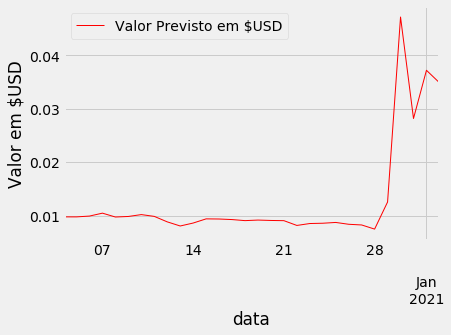

In [53]:
temp_df.tail(30)["Prediction"].plot(label="Valor Previsto em $USD",linewidth=1, color='r')# valores predidos
plt.xlabel("data")
plt.ylabel("Valor em $USD")
plt.legend()

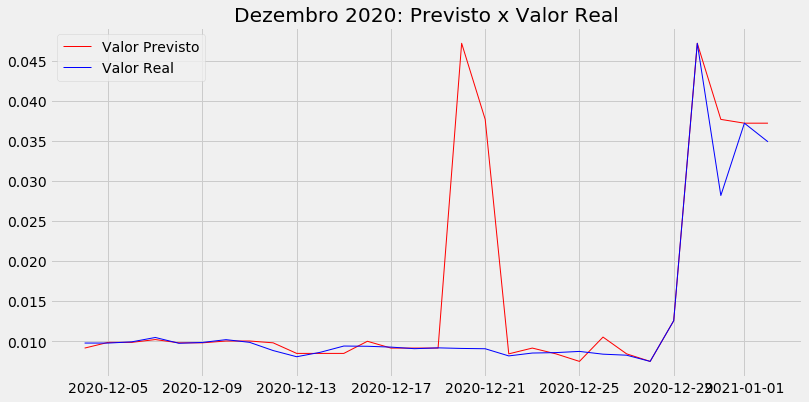

In [54]:
lista_valores = [j for i in valores_preditos for j in i]
#lista_valores

plt.figure(figsize=(12, 6))
teste = temp_df
teste = temp_df.reset_index(drop=False)
teste = teste["Date"].tail(30)
plt.plot(teste, lista_valores, label="Valor Previsto", linewidth=1, color='r')
plt.plot(temp_df.tail(30)["Prediction"], label="Valor Real", linewidth=1, color='b')
plt.title("Dezembro 2020: Previsto x Valor Real")
plt.legend()

## Janeiro

Text(0, 0.5, 'Preco em $ USD')

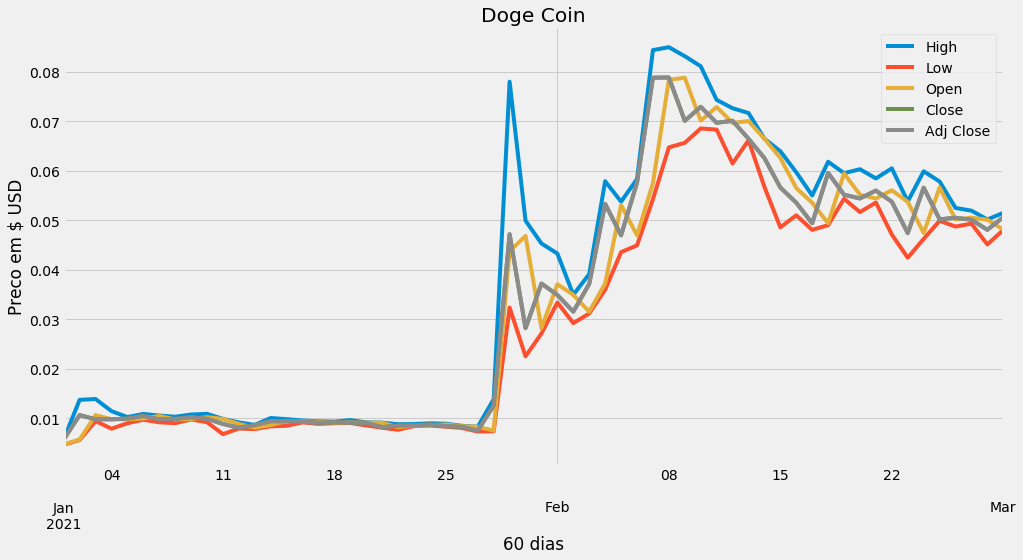

In [55]:
# Previsao com base nos dados de quando o valor do doge passou a ser relevante, entre Dez/20 inicio de Jan/21
df = web.DataReader('DOGE-USD', data_source='yahoo', start='2021-01-01', end='2021-02-28') 
#df.head()

jan = df
jan = jan.drop(["Volume"], axis=1) #Remover a coluna Volume para nao distorcer o grafico.
plt.style.use('fivethirtyeight')
jan.plot(figsize=(15,7.5)) # plota o grafico com valores da dogecoin nos ultimos 6 meses
plt.title("Doge Coin")
plt.xlabel("60 dias")
plt.ylabel("Preco em $ USD")

In [56]:
doge = df
doge = doge.loc[: ,["Close"]] # Utilizamos o preco de fechamento do dia anterior como refencia

# Prever n dias no futuro
predic_day = 30 #30 dias

# cria uma coluna previsao com dados dos proximos 30. A coluna vai servir para ser utilizada na previsao apos a separacao das bases de teste e treinamento
# os dados contidos na coluna Prediction estao 30 dias a frente da doluna Close.
doge["Prediction"] = doge[["Close"]].shift(-predic_day)

In [57]:
# Data set independente
X = np.array(doge.drop(["Prediction"], 1)) #remove os valores da coluna, qual ira conter os dados que estamos procurando
X = X[:len(doge)-predic_day -1] # remove a ultima linha da previsao, pois esta deve estar vazia, por nao conter mais dados a ser previstos
X

array([[0.005685],
       [0.010615],
       [0.009771],
       [0.009767],
       [0.00992 ],
       [0.010465],
       [0.009742],
       [0.009846],
       [0.010194],
       [0.00986 ],
       [0.008835],
       [0.008063],
       [0.008616],
       [0.009397],
       [0.009369],
       [0.009265],
       [0.009067],
       [0.009171],
       [0.009098],
       [0.00906 ],
       [0.008166],
       [0.008524],
       [0.008579],
       [0.008727],
       [0.008383],
       [0.008255],
       [0.007482],
       [0.012555],
       [0.047162]])

In [58]:
#Data set dependende
y = np.array(doge["Prediction"]) # pega os dados da coluna Prediction
y = y[:-predic_day -1] # pegar todos os daos menos o n+1 (N é o numero de dias)
y

array([0.037196, 0.034875, 0.03152 , 0.03712 , 0.053289, 0.046935,
       0.057595, 0.078782, 0.078825, 0.07007 , 0.072896, 0.069676,
       0.070069, 0.06645 , 0.062537, 0.056591, 0.05352 , 0.049376,
       0.059541, 0.055139, 0.054384, 0.05598 , 0.053725, 0.047392,
       0.056555, 0.050167, 0.05048 , 0.050083, 0.048052])

In [59]:
from sklearn.model_selection import train_test_split # separa os dados de trainamento(80%) e dados de teste (20%).

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

In [60]:
from sklearn.ensemble import RandomForestRegressor #Importa os modulos para Random Forest Regressor, para utilizar no modelo

forest = RandomForestRegressor(n_estimators= 2, random_state= 587)
forest.fit(x_train, y_train)
print(forest.score(x_train, y_train)) #mostra a pontuacao de confinca no modelo 

0.6324333257078765


In [61]:
# faz uma comparacao, mostrando o quao perto os dados previstos estao dos dados reais
prediction = forest.predict(x_test)

print("Os valores previstos para Doge Coin sao:", prediction) # valores previstos

print()

print("Os valores reais para Doge Coin sao:" , y_test) # valores reais


Os valores previstos para Doge Coin sao: [0.078782   0.05394467 0.05394467 0.062537   0.062537   0.070069  ]

Os valores reais para Doge Coin sao: [0.07007  0.050167 0.05598  0.06645  0.056591 0.072896]


In [62]:
# Validacao, dados inda nao vistos pelo modelo
temp_df = doge[:-predic_day] # pega os dados menos os ultimos 7, que sao os valores que o modelo deve prever


# armazena os valores que serao utilizados na futura previsao, no caso os ultimos 7,
# ja descontando os dados que retiramos da tabela na variavel acima.
x_val = list(temp_df.tail(30)["Close"])

x_val #os ultimos 30 valores utilizados para realizar a previsao.

[0.005685000214725733,
 0.010614999569952488,
 0.009770999662578106,
 0.009766999632120132,
 0.009920000098645687,
 0.010464999824762344,
 0.00974200014024973,
 0.009846000000834465,
 0.010193999856710434,
 0.009859999641776085,
 0.008834999985992908,
 0.008062999695539474,
 0.008616000413894653,
 0.009397000074386597,
 0.009368999861180782,
 0.009265000000596046,
 0.009066999889910221,
 0.009170999750494957,
 0.009097999893128872,
 0.009060000069439411,
 0.008166000247001648,
 0.008523999713361263,
 0.008578999899327755,
 0.008727000094950199,
 0.008383000269532204,
 0.008255000226199627,
 0.007482000160962343,
 0.012555000372231007,
 0.047162000089883804,
 0.028176000341773033]

In [63]:
#Predicao dos dados:
valores_preditos = []
for p in x_val: # percorre a lista de valores da variavel x_val, utilizando os valores da variavel para realizar a previsao
    prediction = forest.predict([[p]])
    valores_preditos.append(prediction)
#previsao
    print("Previsto:" , prediction) #preco previsto para os proximos 7 dias
print("-"*10)
print("Preco Anterior", temp_df.tail(30)["Prediction"]) 

Previsto: [0.037196]
Previsto: [0.034875]
Previsto: [0.0445575]
Previsto: [0.0473575]
Previsto: [0.053289]
Previsto: [0.040905]
Previsto: [0.057595]
Previsto: [0.078782]
Previsto: [0.06288]
Previsto: [0.078782]
Previsto: [0.070069]
Previsto: [0.06181033]
Previsto: [0.070069]
Previsto: [0.062537]
Previsto: [0.062537]
Previsto: [0.062537]
Previsto: [0.055139]
Previsto: [0.05734]
Previsto: [0.05734]
Previsto: [0.055139]
Previsto: [0.05394467]
Previsto: [0.05394467]
Previsto: [0.05394467]
Previsto: [0.070069]
Previsto: [0.05394467]
Previsto: [0.05394467]
Previsto: [0.05048]
Previsto: [0.042479]
Previsto: [0.048052]
Previsto: [0.042479]
----------
Preco Anterior Date
2021-01-01    0.037196
2021-01-02    0.034875
2021-01-03    0.031520
2021-01-04    0.037120
2021-01-05    0.053289
2021-01-06    0.046935
2021-01-07    0.057595
2021-01-08    0.078782
2021-01-09    0.078825
2021-01-10    0.070070
2021-01-11    0.072896
2021-01-12    0.069676
2021-01-13    0.070069
2021-01-14    0.066450
2021-01

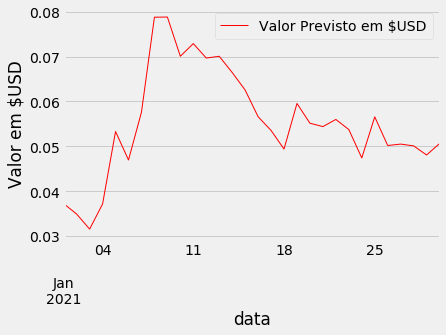

In [64]:
temp_df.tail(30)["Prediction"].plot(label="Valor Previsto em $USD",linewidth=1, color='r')# valores predidos
plt.xlabel("data")
plt.ylabel("Valor em $USD")
plt.legend()

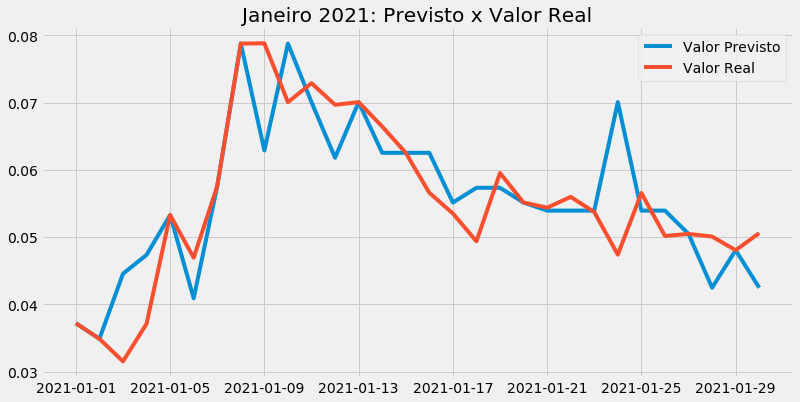

In [65]:
lista_valores = [j for i in valores_preditos for j in i]
#lista_valores

plt.figure(figsize=(12, 6))
teste = temp_df
teste = temp_df.reset_index(drop=False)
teste = teste["Date"].tail(30)
plt.plot(teste, lista_valores, label="Valor Previsto")
plt.plot(temp_df.tail(30)["Prediction"], label="Valor Real")
plt.title("Janeiro 2021: Previsto x Valor Real")
plt.legend()

## Fevereiro

Text(0, 0.5, 'Preco em $ USD')

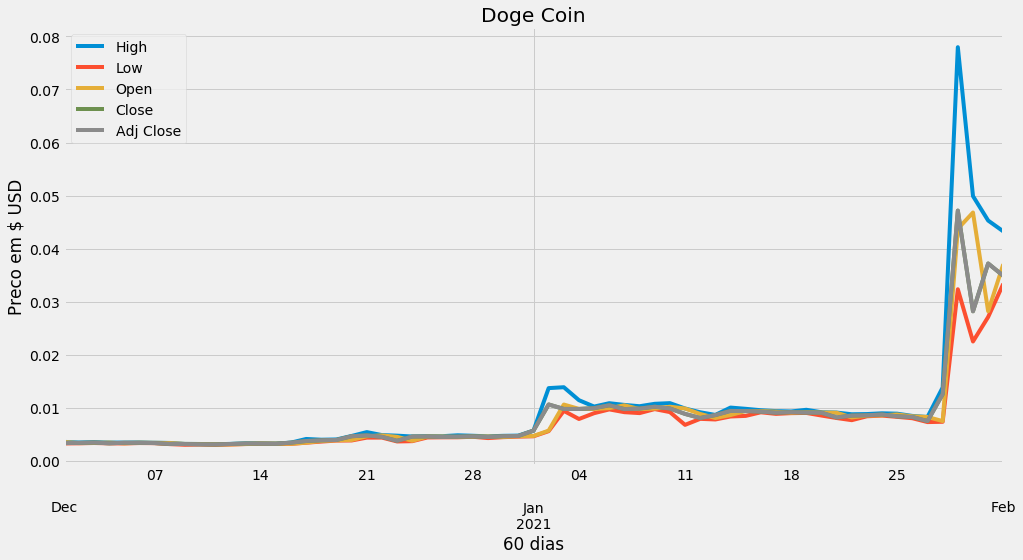

In [66]:
# Previsao com base nos dados de quando o valor do doge passou a ser relevante, entre Dez/20 inicio de Jan/21
df = web.DataReader('DOGE-USD', data_source='yahoo', start='2020-12-01', end='2021-01-31') 

feb = df
feb = feb.drop(["Volume"], axis=1) #Remover a coluna Volume para nao distorcer o grafico.
plt.style.use('fivethirtyeight')
feb.plot(figsize=(15,7.5)) # plota o grafico com valores da dogecoin nos ultimos 6 meses
plt.title("Doge Coin")
plt.xlabel("60 dias")
plt.ylabel("Preco em $ USD")

In [67]:
doge = df
doge = doge.loc[: ,["Close"]] # Utilizamos o preco de fechamento do dia anterior como refencia

# Prever n dias no futuro
predic_day = 30 #30 dias

# cria uma coluna previsao com dados dos proximos 30. A coluna vai servir para ser utilizada na previsao apos a separacao das bases de teste e treinamento
# os dados contidos na coluna Prediction estao 30 dias a frente da doluna Close.
doge["Prediction"] = doge[["Close"]].shift(-predic_day)

In [68]:
# Data set independente
X = np.array(doge.drop(["Prediction"], 1)) #remove os valores da coluna, qual ira conter os dados que estamos procurando
X = X[:len(doge)-predic_day -1] # remove a ultima linha da previsao, pois esta deve estar vazia, por nao conter mais dados a ser previstos
X

array([[0.003335],
       [0.003374],
       [0.003428],
       [0.003298],
       [0.003397],
       [0.003388],
       [0.003342],
       [0.003179],
       [0.003158],
       [0.003105],
       [0.003079],
       [0.003163],
       [0.003256],
       [0.003231],
       [0.003206],
       [0.003416],
       [0.00373 ],
       [0.003858],
       [0.003927],
       [0.004625],
       [0.004787],
       [0.004508],
       [0.003768],
       [0.00457 ],
       [0.004582],
       [0.004494],
       [0.004548],
       [0.004592],
       [0.004486],
       [0.004636],
       [0.004682],
       [0.005685]])

In [69]:
#Data set dependende
y = np.array(doge["Prediction"]) # pega os dados da coluna Prediction
y = y[:-predic_day -1] # pegar todos os daos menos o n+1 (N é o numero de dias)
y

array([0.004682, 0.005685, 0.010615, 0.009771, 0.009767, 0.00992 ,
       0.010465, 0.009742, 0.009846, 0.010194, 0.00986 , 0.008835,
       0.008063, 0.008616, 0.009397, 0.009369, 0.009265, 0.009067,
       0.009171, 0.009098, 0.00906 , 0.008166, 0.008524, 0.008579,
       0.008727, 0.008383, 0.008255, 0.007482, 0.012555, 0.047162,
       0.028176, 0.037196])

In [70]:
from sklearn.model_selection import train_test_split # separa os dados de trainamento(80%) e dados de teste (20%).

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

In [71]:
from sklearn.ensemble import RandomForestRegressor #Importa os modulos para Random Forest Regressor, para utilizar no modelo

forest = RandomForestRegressor(n_estimators= 2, random_state= 587)
forest.fit(x_train, y_train)
print(forest.score(x_train, y_train)) #mostra a pontuacao de confinca no modelo 

0.8299171515005508


In [72]:
# faz uma comparacao, mostrando o quao perto os dados previstos estao dos dados reais
prediction = forest.predict(x_test)

print("Os valores previstos para Doge Coin sao:", prediction) # valores previstos

print()

print("Os valores reais para Doge Coin sao:" , y_test) # valores reais


Os valores previstos para Doge Coin sao: [0.0092415  0.004682   0.047162   0.047162   0.0092415  0.007488
 0.00934275]

Os valores reais para Doge Coin sao: [0.010615 0.010465 0.028176 0.00906  0.009171 0.00992  0.008616]


In [73]:
# Validacao, dados inda nao vistos pelo modelo
temp_df = doge[:-predic_day] # pega os dados menos os ultimos 7, que sao os valores que o modelo deve prever


# armazena os valores que serao utilizados na futura previsao, no caso os ultimos 7,
# ja descontando os dados que retiramos da tabela na variavel acima.
x_val = list(temp_df.tail(30)["Close"])

x_val #os ultimos 30 valores utilizados para realizar a previsao.

[0.00329799996688962,
 0.0033970000222325325,
 0.003387999953702092,
 0.0033420000690966845,
 0.0031789999920874834,
 0.0031580000650137663,
 0.0031049998942762613,
 0.0030789999291300774,
 0.003163000103086233,
 0.0032560001127421856,
 0.0032309999223798513,
 0.0032059999648481607,
 0.003415999934077263,
 0.0037299999967217445,
 0.0038580000400543213,
 0.003926999866962433,
 0.004625000059604645,
 0.004786999896168709,
 0.0045079998672008514,
 0.003768000053241849,
 0.004569999873638153,
 0.0045819999650120735,
 0.004494000226259232,
 0.004548000171780586,
 0.004592000041157007,
 0.004486000165343285,
 0.004635999910533428,
 0.004681999795138836,
 0.005685000214725733,
 0.010614999569952488]

In [74]:
#Predicao dos dados:
valores_preditos = []
for p in x_val: # percorre a lista de valores da variavel x_val, utilizando os valores da variavel para realizar a previsao
    prediction = forest.predict([[p]])
    valores_preditos.append(prediction)
#previsao
    print("Previsto:" , prediction) #preco previsto para os proximos 7 dias
print("-"*10)
print("Preco Anterior", temp_df.tail(30)["Prediction"]) 

Previsto: [0.009771]
Previsto: [0.0092415]
Previsto: [0.007488]
Previsto: [0.004682]
Previsto: [0.00934275]
Previsto: [0.00989545]
Previsto: [0.00989545]
Previsto: [0.00989545]
Previsto: [0.0089755]
Previsto: [0.008063]
Previsto: [0.00934275]
Previsto: [0.00934275]
Previsto: [0.0092415]
Previsto: [0.0092415]
Previsto: [0.0092415]
Previsto: [0.0092415]
Previsto: [0.0278704]
Previsto: [0.047162]
Previsto: [0.0105669]
Previsto: [0.0092415]
Previsto: [0.0084169]
Previsto: [0.0080304]
Previsto: [0.0105669]
Previsto: [0.0084169]
Previsto: [0.0080304]
Previsto: [0.012555]
Previsto: [0.047162]
Previsto: [0.047162]
Previsto: [0.037196]
Previsto: [0.037196]
----------
Preco Anterior Date
2020-12-04    0.009771
2020-12-05    0.009767
2020-12-06    0.009920
2020-12-07    0.010465
2020-12-08    0.009742
2020-12-09    0.009846
2020-12-10    0.010194
2020-12-11    0.009860
2020-12-12    0.008835
2020-12-13    0.008063
2020-12-14    0.008616
2020-12-15    0.009397
2020-12-16    0.009369
2020-12-17    

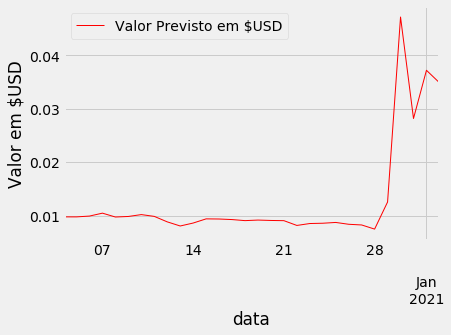

In [75]:
temp_df.tail(30)["Prediction"].plot(label="Valor Previsto em $USD",linewidth=1, color='r')# valores predidos
plt.xlabel("data")
plt.ylabel("Valor em $USD")
plt.legend()

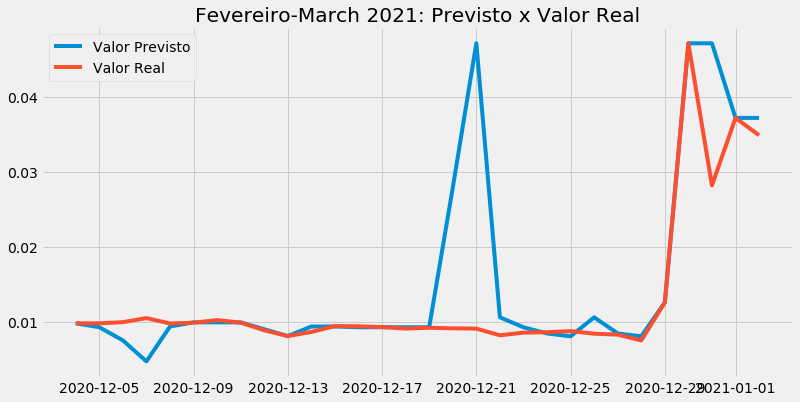

In [76]:
lista_valores = [j for i in valores_preditos for j in i]
#lista_valores

plt.figure(figsize=(12, 6))
teste = temp_df
teste = temp_df.reset_index(drop=False)
teste = teste["Date"].tail(30)
plt.plot(teste, lista_valores, label="Valor Previsto")
plt.plot(temp_df.tail(30)["Prediction"], label="Valor Real")
plt.title("Fevereiro-March 2021: Previsto x Valor Real")
plt.legend()

## Março

Text(0, 0.5, 'Preco em $ USD')

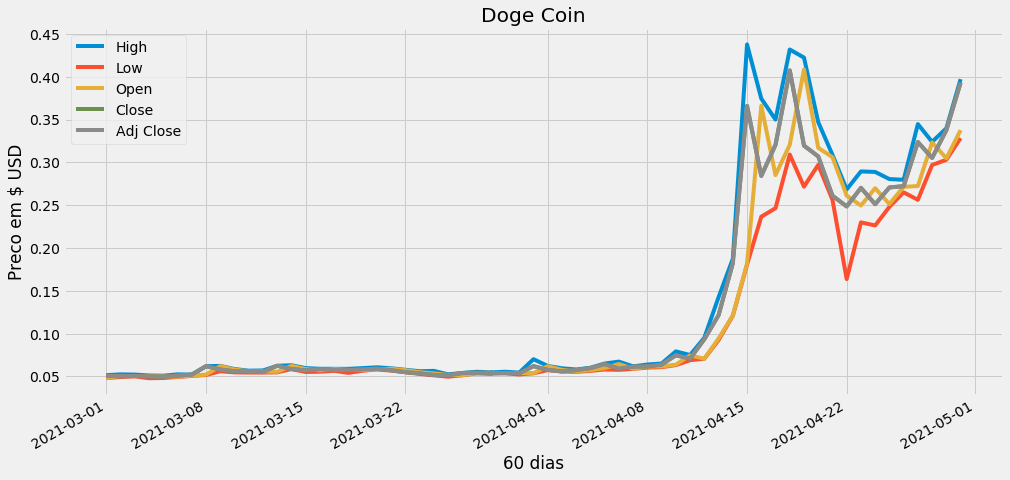

In [77]:
# Previsao com base nos dados de quando o valor do doge passou a ser relevante, entre Dez/20 inicio de Jan/21
df = web.DataReader('DOGE-USD', data_source='yahoo', start='2021-03-01', end='2021-04-30') 

mar = df
mar = mar.drop(["Volume"], axis=1) #Remover a coluna Volume para nao distorcer o grafico.
plt.style.use('fivethirtyeight')
mar.plot(figsize=(15,7.5)) # plota o grafico com valores da dogecoin nos ultimos 6 meses
plt.title("Doge Coin")
plt.xlabel("60 dias")
plt.ylabel("Preco em $ USD")

In [78]:
doge = df
doge = doge.loc[: ,["Close"]] # Utilizamos o preco de fechamento do dia anterior como refencia

# Prever n dias no futuro
predic_day = 30 #30 dias

# cria uma coluna previsao com dados dos proximos 30. A coluna vai servir para ser utilizada na previsao apos a separacao das bases de teste e treinamento
# os dados contidos na coluna Prediction estao 30 dias a frente da doluna Close.
doge["Prediction"] = doge[["Close"]].shift(-predic_day)

In [79]:
# Data set independente
X = np.array(doge.drop(["Prediction"], 1)) #remove os valores da coluna, qual ira conter os dados que estamos procurando
X = X[:len(doge)-predic_day -1] # remove a ultima linha da previsao, pois esta deve estar vazia, por nao conter mais dados a ser previstos
X

array([[0.050599],
       [0.050262],
       [0.050592],
       [0.050048],
       [0.049609],
       [0.050984],
       [0.052122],
       [0.061949],
       [0.057998],
       [0.056004],
       [0.055918],
       [0.055349],
       [0.062432],
       [0.058592],
       [0.057088],
       [0.058607],
       [0.057653],
       [0.057383],
       [0.058328],
       [0.058961],
       [0.057234],
       [0.054962],
       [0.053556],
       [0.051702],
       [0.051448],
       [0.053952],
       [0.054377],
       [0.053698],
       [0.054052],
       [0.0539  ],
       [0.053657]])

In [80]:
#Data set dependende
y = np.array(doge["Prediction"]) # pega os dados da coluna Prediction
y = y[:-predic_day -1] # pegar todos os daos menos o n+1 (N é o numero de dias)
y

array([0.053657  , 0.061986  , 0.057664  , 0.055804  , 0.057404  ,
       0.059696  , 0.064458  , 0.059028  , 0.061464  , 0.061684  ,
       0.063845  , 0.074649  , 0.070767  , 0.093445  , 0.121517  ,
       0.182207  , 0.36587   , 0.28417301, 0.32047501, 0.407318  ,
       0.3195    , 0.306925  , 0.26096699, 0.248509  , 0.27021199,
       0.251111  , 0.27067399, 0.27218801, 0.32368201, 0.30516899,
       0.33756101])

In [81]:
from sklearn.model_selection import train_test_split # separa os dados de trainamento(80%) e dados de teste (20%).

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

In [82]:
from sklearn.ensemble import RandomForestRegressor #Importa os modulos para Random Forest Regressor, para utilizar no modelo

forest = RandomForestRegressor(n_estimators= 2, random_state= 587)
forest.fit(x_train, y_train)
print(forest.score(x_train, y_train)) #mostra a pontuacao de confinca no modelo 

0.7611010744134726


In [83]:
# faz uma comparacao, mostrando o quao perto os dados previstos estao dos dados reais
prediction = forest.predict(x_test)

print("Os valores previstos para Doge Coin sao:", prediction) # valores previstos

print()

print("Os valores reais para Doge Coin sao:" , y_test) # valores reais


Os valores previstos para Doge Coin sao: [0.164954 0.074649 0.093445 0.074649 0.093445 0.121517 0.074649]

Os valores reais para Doge Coin sao: [0.248509 0.306925 0.182207 0.063845 0.407318 0.3195   0.061684]


In [84]:
# Validacao, dados inda nao vistos pelo modelo
temp_df = doge[:-predic_day] # pega os dados menos os ultimos 7, que sao os valores que o modelo deve prever


# armazena os valores que serao utilizados na futura previsao, no caso os ultimos 7,
# ja descontando os dados que retiramos da tabela na variavel acima.
x_val = list(temp_df.tail(30)["Close"])

x_val #os ultimos 30 valores utilizados para realizar a previsao.

[0.050592001527547836,
 0.05004800111055374,
 0.049609001725912094,
 0.05098399892449379,
 0.052122000604867935,
 0.061948999762535095,
 0.05799800157546997,
 0.05600399896502495,
 0.055918000638484955,
 0.05534899979829788,
 0.062431998550891876,
 0.05859199911355972,
 0.05708799883723259,
 0.05860700085759163,
 0.057652998715639114,
 0.05738300085067749,
 0.05832799896597862,
 0.05896100029349327,
 0.05723400041460991,
 0.054962001740932465,
 0.05355599895119667,
 0.051702000200748444,
 0.051447998732328415,
 0.05395200103521347,
 0.0543770007789135,
 0.05369799956679344,
 0.054051999002695084,
 0.05389999970793724,
 0.05365699902176857,
 0.06198599934577942]

In [85]:
#Predicao dos dados:
valores_preditos = []
for p in x_val: # percorre a lista de valores da variavel x_val, utilizando os valores da variavel para realizar a previsao
    prediction = forest.predict([[p]])
    valores_preditos.append(prediction)
#previsao
    print("Previsto:" , prediction) #preco previsto para os proximos 7 dias
print("-"*10)
print("Preco Anterior", temp_df.tail(30)["Prediction"]) 

Previsto: [0.057664]
Previsto: [0.058895]
Previsto: [0.057404]
Previsto: [0.059696]
Previsto: [0.062077]
Previsto: [0.0648975]
Previsto: [0.0774545]
Previsto: [0.074649]
Previsto: [0.074649]
Previsto: [0.074649]
Previsto: [0.070767]
Previsto: [0.093445]
Previsto: [0.121517]
Previsto: [0.093445]
Previsto: [0.28417301]
Previsto: [0.28417301]
Previsto: [0.093445]
Previsto: [0.093445]
Previsto: [0.121517]
Previsto: [0.074649]
Previsto: [0.33756101]
Previsto: [0.164954]
Previsto: [0.164954]
Previsto: [0.28739651]
Previsto: [0.27067399]
Previsto: [0.27218801]
Previsto: [0.28739651]
Previsto: [0.3144255]
Previsto: [0.33756101]
Previsto: [0.0648975]
----------
Preco Anterior Date
2021-03-03    0.057664
2021-03-04    0.055804
2021-03-05    0.057404
2021-03-06    0.059696
2021-03-07    0.064458
2021-03-08    0.059028
2021-03-09    0.061464
2021-03-10    0.061684
2021-03-11    0.063845
2021-03-12    0.074649
2021-03-13    0.070767
2021-03-14    0.093445
2021-03-15    0.121517
2021-03-16    0.1822

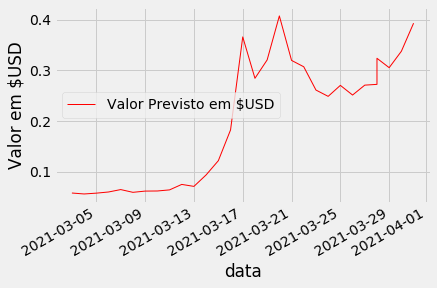

In [86]:
temp_df.tail(30)["Prediction"].plot(label="Valor Previsto em $USD",linewidth=1, color='r')# valores predidos
plt.xlabel("data")
plt.ylabel("Valor em $USD")
plt.legend()

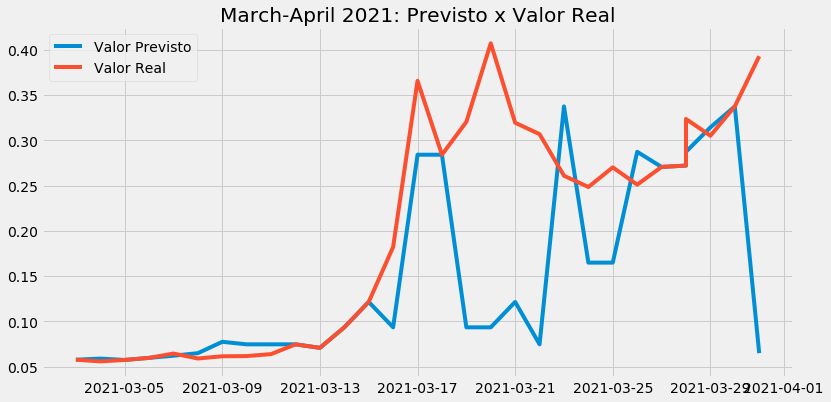

In [87]:
lista_valores = [j for i in valores_preditos for j in i]
#lista_valores

plt.figure(figsize=(12, 6))
teste = temp_df
teste = temp_df.reset_index(drop=False)
teste = teste["Date"].tail(30)
plt.plot(teste, lista_valores, label="Valor Previsto")
plt.plot(temp_df.tail(30)["Prediction"], label="Valor Real")
plt.title("March-April 2021: Previsto x Valor Real")
plt.legend()

## Abril

Text(0, 0.5, 'Preco em $ USD')

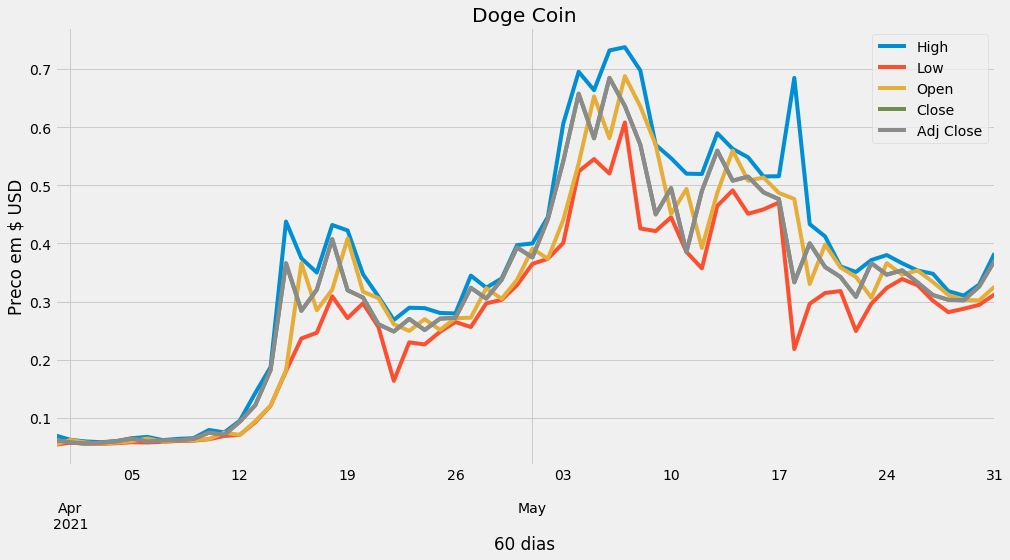

In [88]:
# Previsao com base nos dados de quando o valor do doge passou a ser relevante, entre Dez/20 inicio de Jan/21
df = web.DataReader('DOGE-USD', data_source='yahoo', start='2021-04-01', end='2021-05-31') 

apr = df
apr = apr.drop(["Volume"], axis=1) #Remover a coluna Volume para nao distorcer o grafico.
plt.style.use('fivethirtyeight')
apr.plot(figsize=(15,7.5)) # plota o grafico com valores da dogecoin nos ultimos 6 meses
plt.title("Doge Coin")
plt.xlabel("60 dias")
plt.ylabel("Preco em $ USD")

In [89]:
doge = df
doge = doge.loc[: ,["Close"]] # Utilizamos o preco de fechamento do dia anterior como refencia

# Prever n dias no futuro
predic_day = 30 #30 dias

# cria uma coluna previsao com dados dos proximos 30. A coluna vai servir para ser utilizada na previsao apos a separacao das bases de teste e treinamento
# os dados contidos na coluna Prediction estao 30 dias a frente da doluna Close.
doge["Prediction"] = doge[["Close"]].shift(-predic_day)

In [90]:
# Data set independente
X = np.array(doge.drop(["Prediction"], 1)) #remove os valores da coluna, qual ira conter os dados que estamos procurando
X = X[:len(doge)-predic_day -1] # remove a ultima linha da previsao, pois esta deve estar vazia, por nao conter mais dados a ser previstos
X

array([[0.061986  ],
       [0.057664  ],
       [0.055804  ],
       [0.057404  ],
       [0.059696  ],
       [0.064458  ],
       [0.059028  ],
       [0.061464  ],
       [0.061684  ],
       [0.063845  ],
       [0.074649  ],
       [0.070767  ],
       [0.093445  ],
       [0.121517  ],
       [0.182207  ],
       [0.36587   ],
       [0.28417301],
       [0.32047501],
       [0.407318  ],
       [0.3195    ],
       [0.306925  ],
       [0.26096699],
       [0.248509  ],
       [0.27021199],
       [0.251111  ],
       [0.27067399],
       [0.27218801],
       [0.32368201],
       [0.30516899],
       [0.33756101],
       [0.39298701]])

In [91]:
#Data set dependende
y = np.array(doge["Prediction"]) # pega os dados da coluna Prediction
y = y[:-predic_day -1] # pegar todos os daos menos o n+1 (N é o numero de dias)
y

array([0.39298701, 0.376046  , 0.44170699, 0.54133397, 0.65763301,
       0.58080399, 0.68477702, 0.63643903, 0.57007003, 0.44996399,
       0.495231  , 0.38537601, 0.490374  , 0.55960399, 0.507972  ,
       0.51489502, 0.487892  , 0.47611499, 0.333123  , 0.40019399,
       0.359382  , 0.34237099, 0.30807099, 0.366162  , 0.346302  ,
       0.35369301, 0.33294499, 0.311205  , 0.30311   , 0.30222401,
       0.32580999])

In [92]:
from sklearn.model_selection import train_test_split # separa os dados de trainamento(80%) e dados de teste (20%).

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

In [93]:
from sklearn.ensemble import RandomForestRegressor #Importa os modulos para Random Forest Regressor, para utilizar no modelo

forest = RandomForestRegressor(n_estimators= 2, random_state= 587)
forest.fit(x_train, y_train)
print(forest.score(x_train, y_train)) #mostra a pontuacao de confinca no modelo 

0.7754342580188778


In [94]:
# faz uma comparacao, mostrando o quao perto os dados previstos estao dos dados reais
prediction = forest.predict(x_test)

print("Os valores previstos para Doge Coin sao:", prediction) # valores previstos

print()

print("Os valores reais para Doge Coin sao:" , y_test) # valores reais


Os valores previstos para Doge Coin sao: [0.33765799 0.4403035  0.4403035  0.47611499 0.34433649 0.51471302
 0.51471302]

Os valores reais para Doge Coin sao: [0.366162   0.55960399 0.490374   0.30222401 0.30807099 0.58080399
 0.44996399]


In [95]:
# Validacao, dados inda nao vistos pelo modelo
temp_df = doge[:-predic_day] # pega os dados menos os ultimos 7, que sao os valores que o modelo deve prever


# armazena os valores que serao utilizados na futura previsao, no caso os ultimos 7,
# ja descontando os dados que retiramos da tabela na variavel acima.
x_val = list(temp_df.tail(30)["Close"])

x_val #os ultimos 30 valores utilizados para realizar a previsao.

[0.05580399930477142,
 0.05740400031208992,
 0.059696000069379807,
 0.06445799767971039,
 0.05902799963951111,
 0.06146400049328804,
 0.06168400123715401,
 0.06384500116109848,
 0.07464899867773056,
 0.07076700031757355,
 0.09344500303268433,
 0.12151700258255005,
 0.18220700323581696,
 0.36586999893188477,
 0.28417301177978516,
 0.3204750120639801,
 0.40731799602508545,
 0.31949999928474426,
 0.3069249987602234,
 0.2609669864177704,
 0.2485090047121048,
 0.27021199464797974,
 0.2511110007762909,
 0.2706739902496338,
 0.2721880078315735,
 0.3236820101737976,
 0.3051689863204956,
 0.3375610113143921,
 0.3929870128631592,
 0.37604600191116333]

In [96]:
#Predicao dos dados:
valores_preditos = []
for p in x_val: # percorre a lista de valores da variavel x_val, utilizando os valores da variavel para realizar a previsao
    prediction = forest.predict([[p]])
    valores_preditos.append(prediction)
#previsao
    print("Previsto:" , prediction) #preco previsto para os proximos 7 dias
print("-"*10)
print("Preco Anterior", temp_df.tail(30)["Prediction"]) 

Previsto: [0.54133397]
Previsto: [0.54133397]
Previsto: [0.66060802]
Previsto: [0.51471302]
Previsto: [0.6130555]
Previsto: [0.63643903]
Previsto: [0.60325453]
Previsto: [0.51471302]
Previsto: [0.4403035]
Previsto: [0.38537601]
Previsto: [0.4403035]
Previsto: [0.4403035]
Previsto: [0.507972]
Previsto: [0.51489502]
Previsto: [0.487892]
Previsto: [0.47611499]
Previsto: [0.32946649]
Previsto: [0.40019399]
Previsto: [0.359382]
Previsto: [0.34237099]
Previsto: [0.34433649]
Previsto: [0.33765799]
Previsto: [0.34433649]
Previsto: [0.33765799]
Previsto: [0.33765799]
Previsto: [0.47611499]
Previsto: [0.30311]
Previsto: [0.47611499]
Previsto: [0.32580999]
Previsto: [0.51489502]
----------
Preco Anterior Date
2021-04-02    0.441707
2021-04-03    0.541334
2021-04-04    0.657633
2021-04-05    0.580804
2021-04-06    0.684777
2021-04-07    0.636439
2021-04-08    0.570070
2021-04-09    0.449964
2021-04-10    0.495231
2021-04-11    0.385376
2021-04-12    0.490374
2021-04-13    0.559604
2021-04-14    0.

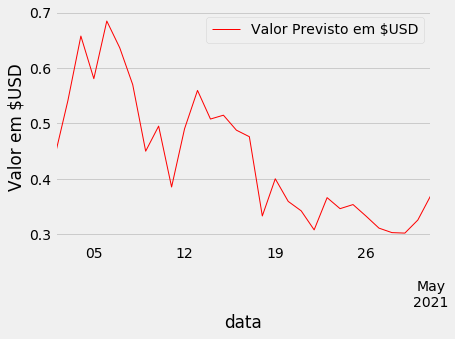

In [97]:
temp_df.tail(30)["Prediction"].plot(label="Valor Previsto em $USD",linewidth=1, color='r')# valores predidos
plt.xlabel("data")
plt.ylabel("Valor em $USD")
plt.legend()

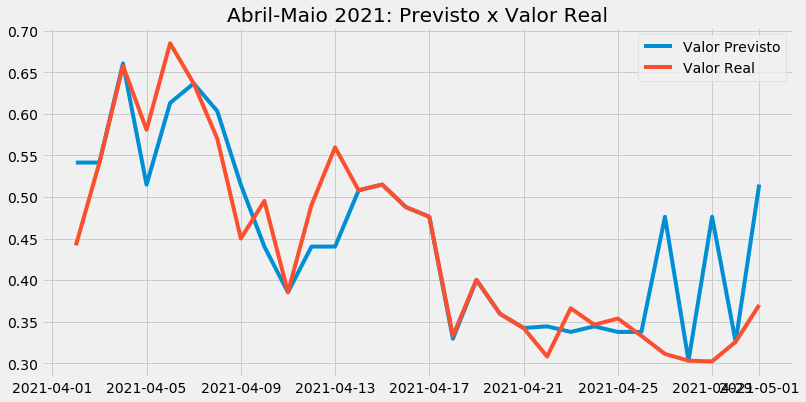

In [98]:
lista_valores = [j for i in valores_preditos for j in i]
#lista_valores

plt.figure(figsize=(12, 6))
teste = temp_df
teste = temp_df.reset_index(drop=False)
teste = teste["Date"].tail(30)
plt.plot(teste, lista_valores, label="Valor Previsto")
plt.plot(temp_df.tail(30)["Prediction"], label="Valor Real")
plt.title("Abril-Maio 2021: Previsto x Valor Real")
plt.legend()

## Maio

Text(0, 0.5, 'Preco em $ USD')

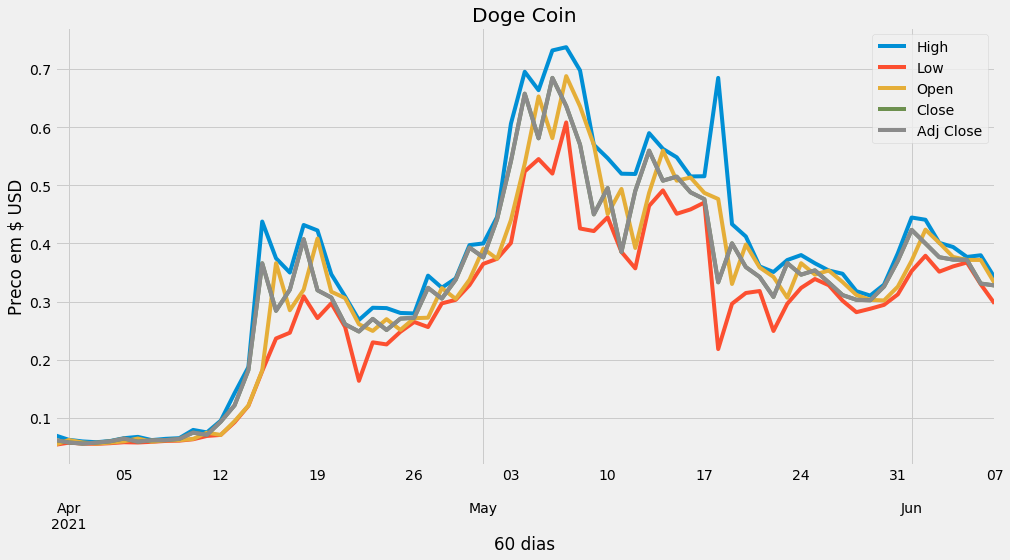

In [99]:
# Previsao com base nos dados de quando o valor do doge passou a ser relevante, entre Dez/20 inicio de Jan/21
df = web.DataReader('DOGE-USD', data_source='yahoo', start='2021-04-01', end='2021-06-07') 

may = df
may = may.drop(["Volume"], axis=1) #Remover a coluna Volume para nao distorcer o grafico.
plt.style.use('fivethirtyeight')
may.plot(figsize=(15,7.5)) # plota o grafico com valores da dogecoin nos ultimos 6 meses
plt.title("Doge Coin")
plt.xlabel("60 dias")
plt.ylabel("Preco em $ USD")

In [100]:
doge = df
doge = doge.loc[: ,["Close"]] # Utilizamos o preco de fechamento do dia anterior como refencia

# Prever n dias no futuro
predic_day = 30 #30 dias

# cria uma coluna previsao com dados dos proximos 30. A coluna vai servir para ser utilizada na previsao apos a separacao das bases de teste e treinamento
# os dados contidos na coluna Prediction estao 30 dias a frente da doluna Close.
doge["Prediction"] = doge[["Close"]].shift(-predic_day)

In [101]:
# Data set independente
X = np.array(doge.drop(["Prediction"], 1)) #remove os valores da coluna, qual ira conter os dados que estamos procurando
X = X[:len(doge)-predic_day -1] # remove a ultima linha da previsao, pois esta deve estar vazia, por nao conter mais dados a ser previstos
X

array([[0.061986  ],
       [0.057664  ],
       [0.055804  ],
       [0.057404  ],
       [0.059696  ],
       [0.064458  ],
       [0.059028  ],
       [0.061464  ],
       [0.061684  ],
       [0.063845  ],
       [0.074649  ],
       [0.070767  ],
       [0.093445  ],
       [0.121517  ],
       [0.182207  ],
       [0.36587   ],
       [0.28417301],
       [0.32047501],
       [0.407318  ],
       [0.3195    ],
       [0.306925  ],
       [0.26096699],
       [0.248509  ],
       [0.27021199],
       [0.251111  ],
       [0.27067399],
       [0.27218801],
       [0.32368201],
       [0.30516899],
       [0.33756101],
       [0.39298701],
       [0.376046  ],
       [0.44170699],
       [0.54133397],
       [0.65763301],
       [0.58080399],
       [0.68477702],
       [0.63643903]])

In [102]:
#Data set dependende
y = np.array(doge["Prediction"]) # pega os dados da coluna Prediction
y = y[:-predic_day -1] # pegar todos os daos menos o n+1 (N é o numero de dias)
y

array([0.39298701, 0.376046  , 0.44170699, 0.54133397, 0.65763301,
       0.58080399, 0.68477702, 0.63643903, 0.57007003, 0.44996399,
       0.495231  , 0.38537601, 0.490374  , 0.55960399, 0.507972  ,
       0.51489502, 0.487892  , 0.47611499, 0.333123  , 0.40019399,
       0.359382  , 0.34237099, 0.30807099, 0.366162  , 0.346302  ,
       0.35369301, 0.33294499, 0.311205  , 0.30311   , 0.30222401,
       0.32580999, 0.37007701, 0.423374  , 0.39996299, 0.37632301,
       0.372177  , 0.37180701, 0.33105001])

In [103]:
from sklearn.model_selection import train_test_split # separa os dados de trainamento(80%) e dados de teste (20%).

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

In [104]:
from sklearn.ensemble import RandomForestRegressor #Importa os modulos para Random Forest Regressor, para utilizar no modelo

forest = RandomForestRegressor(n_estimators= 2, random_state= 587)
forest.fit(x_train, y_train)
print(forest.score(x_train, y_train)) #mostra a pontuacao de confinca no modelo 

0.8553045592963694


In [105]:
# faz uma comparacao, mostrando o quao perto os dados previstos estao dos dados reais
prediction = forest.predict(x_test)

print("Os valores previstos para Doge Coin sao:", prediction) # valores previstos

print()

print("Os valores reais para Doge Coin sao:" , y_test) # valores reais


Os valores previstos para Doge Coin sao: [0.68477702 0.54133397 0.37180701 0.351652   0.38537601 0.385885
 0.54133397 0.35992751]

Os valores reais para Doge Coin sao: [0.65763301 0.376046   0.37632301 0.359382   0.495231   0.372177
 0.44170699 0.34237099]


In [106]:
# Validacao, dados inda nao vistos pelo modelo
temp_df = doge[:-predic_day] # pega os dados menos os ultimos 7, que sao os valores que o modelo deve prever


# armazena os valores que serao utilizados na futura previsao, no caso os ultimos 7,
# ja descontando os dados que retiramos da tabela na variavel acima.
x_val = list(temp_df.tail(30)["Close"])

x_val #os ultimos 30 valores utilizados para realizar a previsao.

[0.06384500116109848,
 0.07464899867773056,
 0.07076700031757355,
 0.09344500303268433,
 0.12151700258255005,
 0.18220700323581696,
 0.36586999893188477,
 0.28417301177978516,
 0.3204750120639801,
 0.40731799602508545,
 0.31949999928474426,
 0.3069249987602234,
 0.2609669864177704,
 0.2485090047121048,
 0.27021199464797974,
 0.2511110007762909,
 0.2706739902496338,
 0.2721880078315735,
 0.3236820101737976,
 0.3051689863204956,
 0.3375610113143921,
 0.3929870128631592,
 0.37604600191116333,
 0.44170698523521423,
 0.5413339734077454,
 0.6576330065727234,
 0.5808039903640747,
 0.684777021408081,
 0.6364390254020691,
 0.5700700283050537]

In [107]:
#Predicao dos dados:
valores_preditos = []
for p in x_val: # percorre a lista de valores da variavel x_val, utilizando os valores da variavel para realizar a previsao
    prediction = forest.predict([[p]])
    valores_preditos.append(prediction)
#previsao
    print("Previsto:" , prediction) #preco previsto para os proximos 7 dias
print("-"*10)
print("Preco Anterior", temp_df.tail(30)["Prediction"]) 

Previsto: [0.51471302]
Previsto: [0.38537601]
Previsto: [0.38537601]
Previsto: [0.437875]
Previsto: [0.55960399]
Previsto: [0.55960399]
Previsto: [0.44248602]
Previsto: [0.487892]
Previsto: [0.47611499]
Previsto: [0.333123]
Previsto: [0.40019399]
Previsto: [0.351652]
Previsto: [0.35992751]
Previsto: [0.30807099]
Previsto: [0.35992751]
Previsto: [0.346302]
Previsto: [0.35369301]
Previsto: [0.343319]
Previsto: [0.311205]
Previsto: [0.351652]
Previsto: [0.30222401]
Previsto: [0.32946649]
Previsto: [0.44248602]
Previsto: [0.423374]
Previsto: [0.41166849]
Previsto: [0.37180701]
Previsto: [0.385885]
Previsto: [0.37180701]
Previsto: [0.37180701]
Previsto: [0.385885]
----------
Preco Anterior Date
2021-04-09    0.449964
2021-04-10    0.495231
2021-04-11    0.385376
2021-04-12    0.490374
2021-04-13    0.559604
2021-04-14    0.507972
2021-04-15    0.514895
2021-04-16    0.487892
2021-04-17    0.476115
2021-04-18    0.333123
2021-04-19    0.400194
2021-04-20    0.359382
2021-04-21    0.342371
20

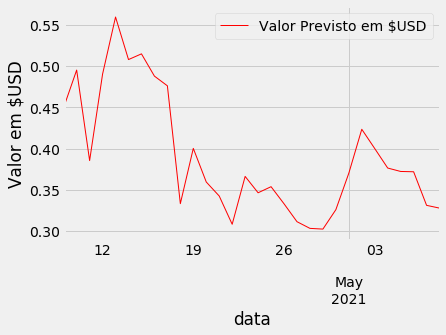

In [108]:
temp_df.tail(30)["Prediction"].plot(label="Valor Previsto em $USD",linewidth=1, color='r')# valores predidos
plt.xlabel("data")
plt.ylabel("Valor em $USD")
plt.legend()

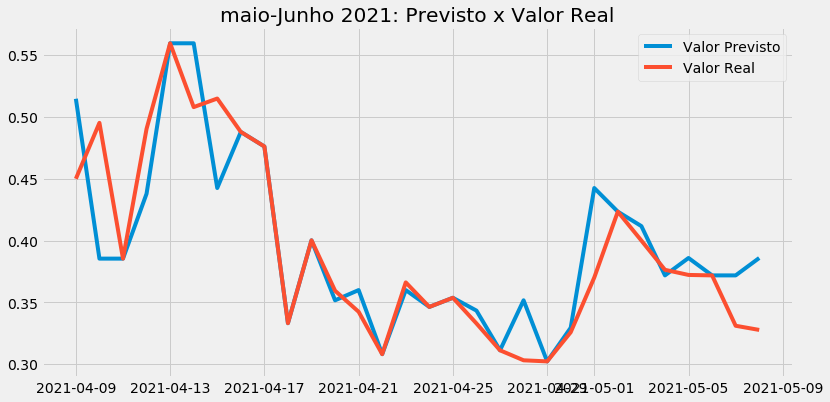

In [109]:
lista_valores = [j for i in valores_preditos for j in i]
#lista_valores

plt.figure(figsize=(12, 6))
teste = temp_df
teste = temp_df.reset_index(drop=False)
teste = teste["Date"].tail(30)
plt.plot(teste, lista_valores, label="Valor Previsto")
plt.plot(temp_df.tail(30)["Prediction"], label="Valor Real")
plt.title("maio-Junho 2021: Previsto x Valor Real")
plt.legend()